In [39]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
data=pd.read_csv('/kaggle/input/pharma-sales-data/salesdaily.csv')
data.head(5)


datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  
0   248     Thursday  
1   276       Friday  
2   276     Saturday  
3   276       Sunday  
4   276       Monday

In [42]:
data.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name'],
      dtype='object')

In [43]:
data['Total Sales']=data[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']].sum(axis=1)

In [44]:
data.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  Total Sales  
0   248     Thursday        48.47  
1   276       Friday       107.00  
2   276     Saturday        91.35  
3   276       Sunday        66.10  
4   276       Monday        58.20

In [45]:
data.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour  Total Sales  
count  2106.000000  2106.000000  
mean    275.945869    60.586659  
std       1.970547    21.561684  
min     190.000000     0.000000  
25%     276.000000    46.446750  
50%     276.000000    58.466500  
75%     276.000000    72.814250  
max     276.000000   198.950000

In [46]:
data.isnull().values.any()

False

In [47]:
monthly_data = data.groupby(by='Month')['Total Sales'].sum().reset_index()

monthly_data=pd.DataFrame(monthly_data)
monthly_data.head()

Month   Total Sales
0      1  13970.691083
1      2  11604.568583
2      3  11363.605000
3      4  10248.718000
4      5   9925.967667

In [48]:

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

monthly_data['Month'] = monthly_data['Month'].astype(int)
monthly_data['Month'] = monthly_data['Month'].map(month_names)


In [49]:
monthly_data.head()

Month   Total Sales
0   January  13970.691083
1  February  11604.568583
2     March  11363.605000
3     April  10248.718000
4       May   9925.967667

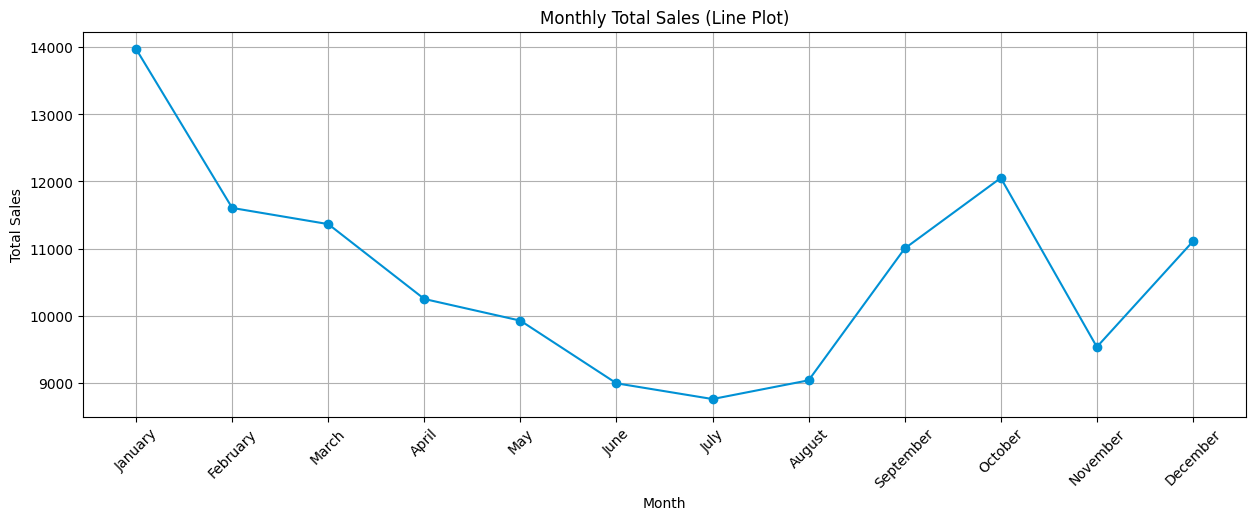

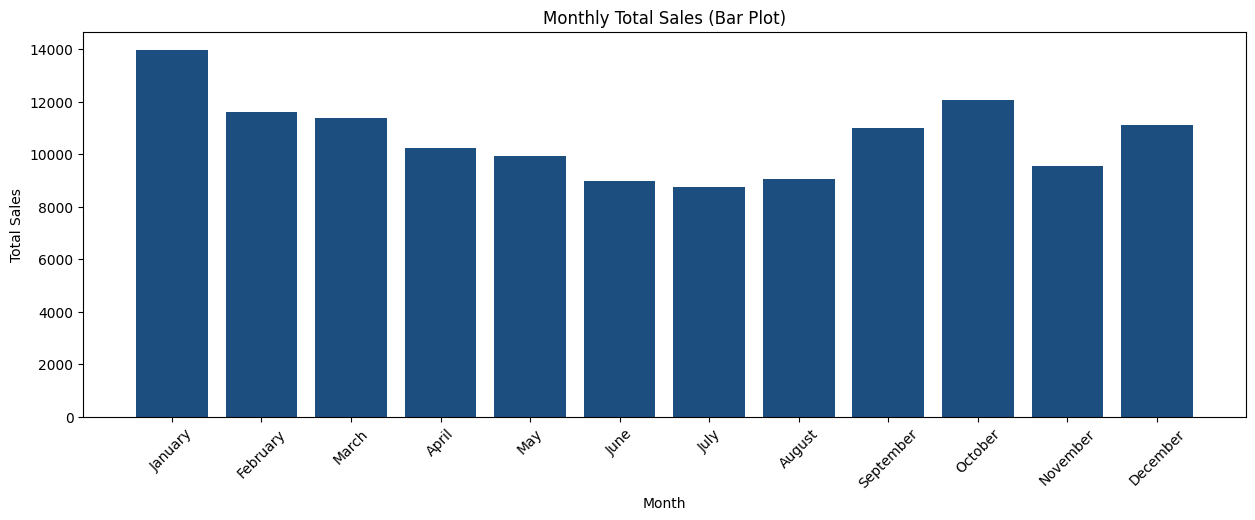

In [50]:
# Viewing the line plot
plt.figure(figsize=(15, 5))
plt.plot(monthly_data['Month'], monthly_data['Total Sales'], marker='o', linestyle='-', color='#0091D5')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales (Line Plot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Viewing the bar plot
plt.figure(figsize=(15, 5))
plt.bar(monthly_data['Month'], monthly_data['Total Sales'], color='#1C4E80')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Total Sales (Bar Plot)')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()


At the aggregated level, we observe a clear seasonal pattern:

- Sales peak in January and see a steady decline towards July
- There is a peak observed during October and December

In [51]:
data.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0  1/2/2014    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1  1/3/2014    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2  1/4/2014    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3  1/5/2014    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4  1/6/2014    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  Total Sales  
0   248     Thursday        48.47  
1   276       Friday       107.00  
2   276     Saturday        91.35  
3   276       Sunday        66.10  
4   276       Monday        58.20

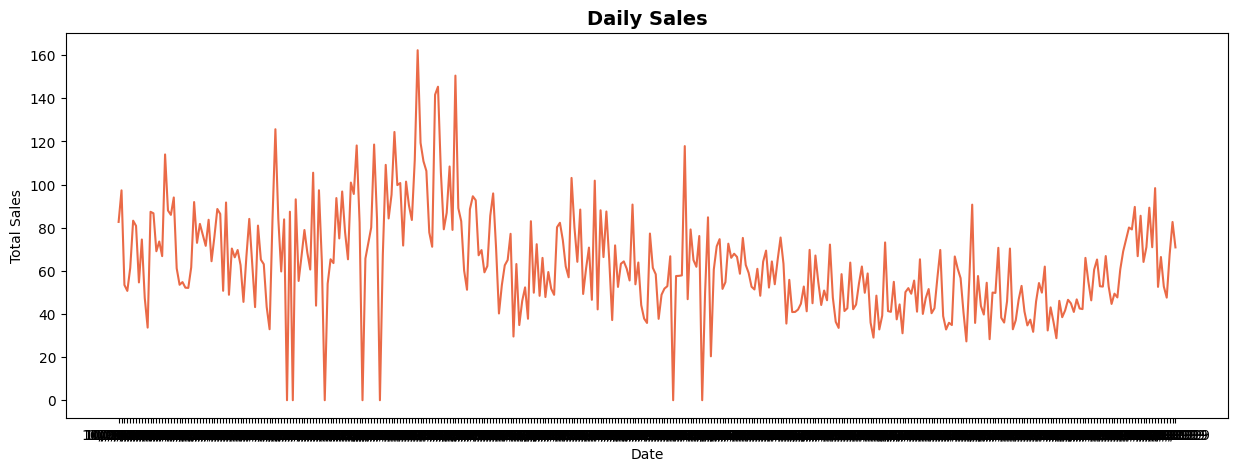

In [52]:
last_year=data.tail(365)
plt.figure(figsize=(15, 5))
plt.plot(last_year['datum'], last_year['Total Sales'], linestyle='-', color='#EA6A47')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Sales', fontsize=14, fontweight='bold')
#plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

At the Daily level, there is too much noise to be able to effectively extract patterns, we can however check to see if there is a seasonality during the week.

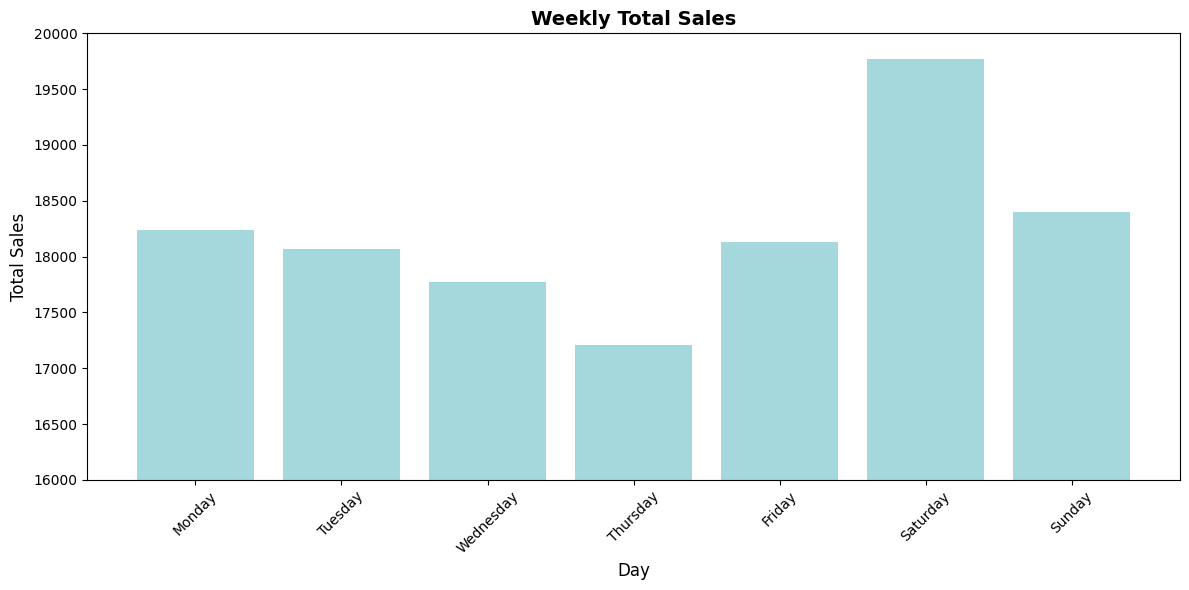

In [53]:
weekly_data = data.groupby(by='Weekday Name')['Total Sales'].sum().reset_index()

weekly_data=pd.DataFrame(weekly_data)

weekly_data['Total Sales'] = weekly_data['Total Sales'].astype(int)

# Defining the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

weekly_data = weekly_data.sort_values(by='Weekday Name', key=lambda x: pd.Categorical(x, categories=weekday_order))



plt.figure(figsize=(12, 6))
plt.bar(weekly_data['Weekday Name'], weekly_data['Total Sales'], color='#A5D8DD')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title('Weekly Total Sales', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
#plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(16000, 20000)  # Adjust the y-axis limits for better visibility
plt.tight_layout()
plt.show()




At the weekly level, there are couple of notable observations:

- Sales seem to decline over the course of the week with the lowest point being Thursday
- The weekends produce the highest sales with Saturdays being by far the highest

In [54]:
data.columns

Index(['datum', 'M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06', 'Year', 'Month', 'Hour', 'Weekday Name', 'Total Sales'],
      dtype='object')

In [55]:

monthly_sales = data.groupby(['Month'])[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sum()
weekly_sales = data.groupby(['Weekday Name'])[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']].sum()

monthly_sales_normalized = monthly_sales.divide(monthly_sales.max())
weekly_sales_normalized = weekly_sales.divide(weekly_sales.max())


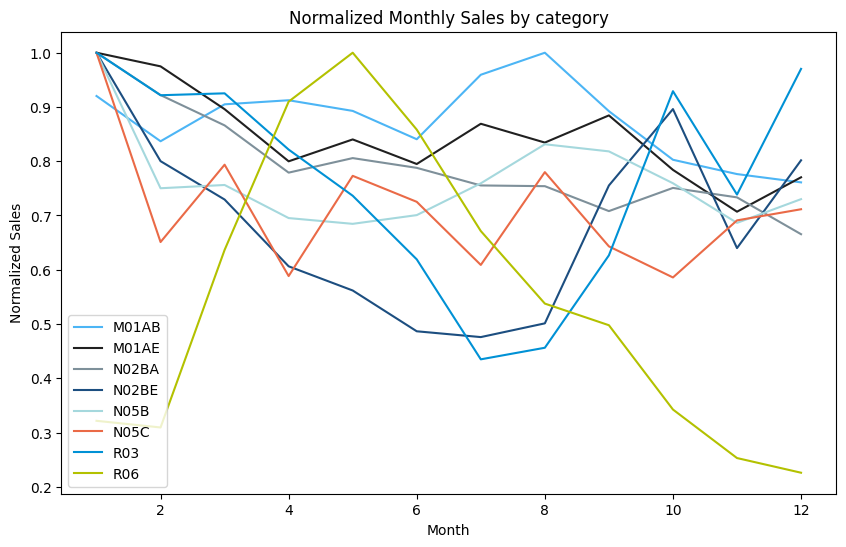

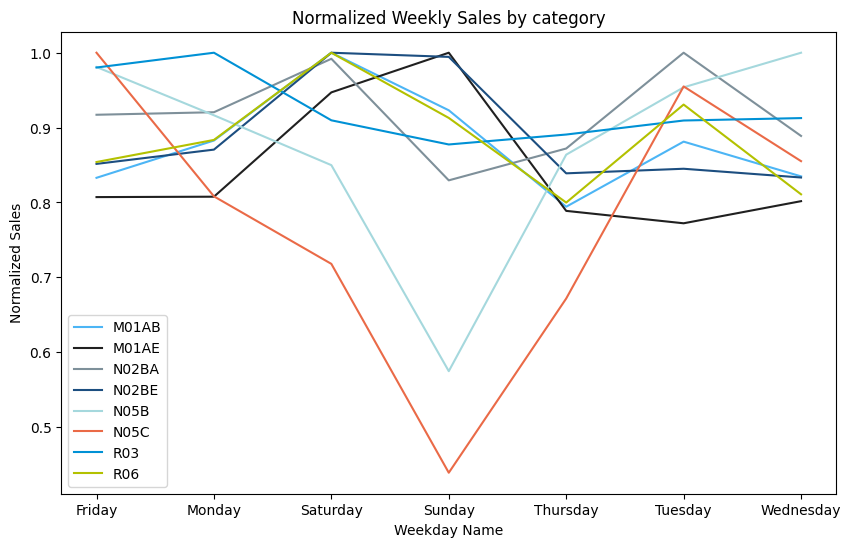

In [56]:
custom_palette = ['#4CB5F5', '#202020', '#7E909A','#1C4E80','#A5D8DD','#EA6A47','#0091D5','#B3C100']  #Custom colors for visual appeal

plt.figure(figsize=(10, 6))
for i, series in enumerate(monthly_sales_normalized.columns[0:]):
    sns.lineplot(data=monthly_sales_normalized, x='Month', y=series, label=series, color=custom_palette[i % len(custom_palette)])
plt.title('Normalized Monthly Sales by category')
plt.xlabel('Month')
plt.ylabel('Normalized Sales')
plt.legend()
plt.show()

# Plot line plots for weekly sales normalized by series with custom colors
plt.figure(figsize=(10, 6))
for i, series in enumerate(weekly_sales_normalized.columns[0:]):
    sns.lineplot(data=weekly_sales_normalized, x='Weekday Name', y=series, label=series, color=custom_palette[i % len(custom_palette)])
plt.title('Normalized Weekly Sales by category')
plt.xlabel('Weekday Name')
plt.ylabel('Normalized Sales')
plt.legend()
plt.show()

As we can see, different products exhibit different seasonalities throughout the year and the week. There are also some notable common patterns as follows:

- Sales peak in January and dip near February
- There is a peak observed on Tuesdays each week
- Sales on Sundays are the lowest for most products

In [57]:
corr_matrix=monthly_sales_normalized.corr()

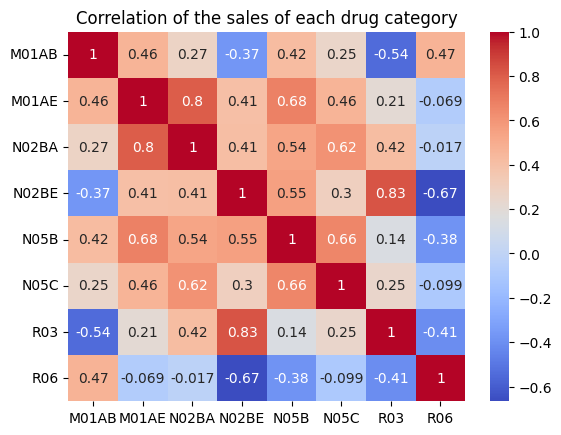

In [58]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation of the sales of each drug category')
plt.show()

In [59]:
data['datum'] = pd.to_datetime(data['datum'])


In [60]:
df=data.copy()
df.set_index('datum', inplace=True)

monthly_level_data = df.resample('M').sum()
monthly_level_data= monthly_level_data[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']]


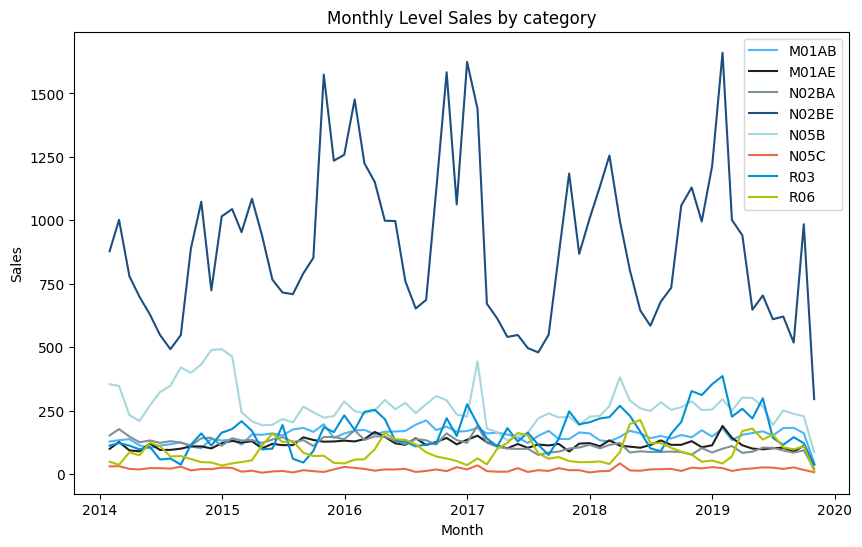

In [61]:
custom_palette = ['#4CB5F5', '#202020', '#7E909A','#1C4E80','#A5D8DD','#EA6A47','#0091D5','#B3C100']  

plt.figure(figsize=(10, 6))
for i, series in enumerate(monthly_level_data.columns[0:]):
    sns.lineplot(data=monthly_level_data, x='datum', y=series, label=series, color=custom_palette[i % len(custom_palette)])
plt.title('Monthly Level Sales by category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [62]:
weekly_level_data = df.resample('W').sum()
weekly_level_data= weekly_level_data[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03',
       'R06']]
weekly_level_data.head()


M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
datum                                                          
2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
2014-01-26  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
2014-02-02  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0

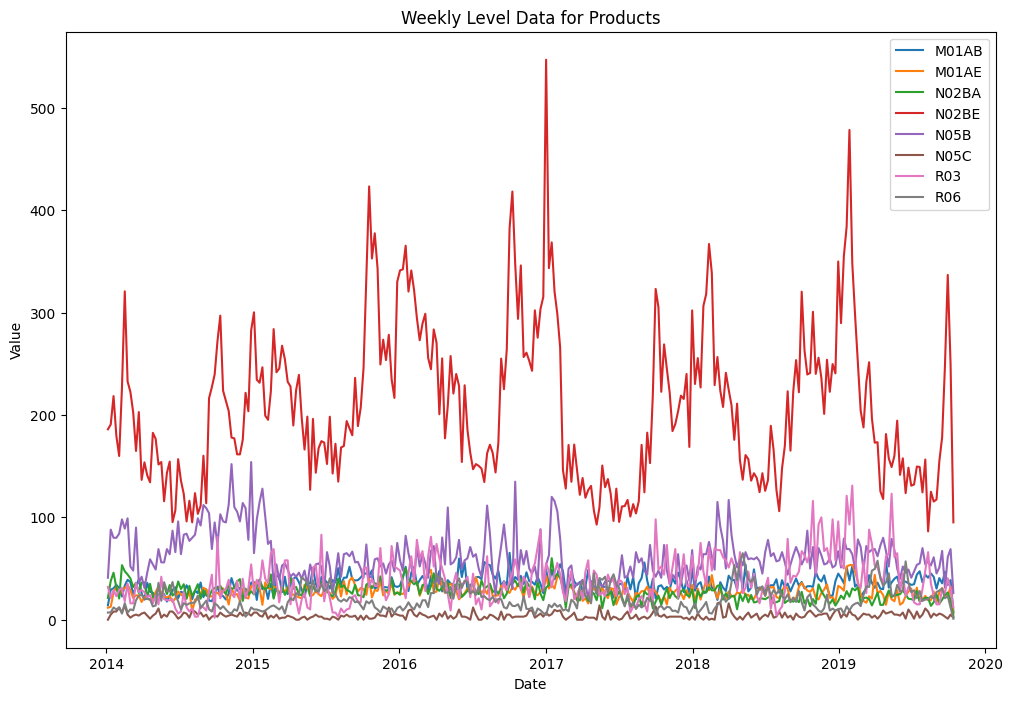

In [63]:
plt.figure(figsize=(12, 8))

for product in weekly_level_data.columns:
    plt.plot(weekly_level_data.index, weekly_level_data[product], label=product)

plt.title('Weekly Level Data for Products')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [64]:
weekly_test_data=weekly_level_data.tail(50)

In [65]:
import statsmodels.api as sm

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
   resDiff = sm.tsa.arma_order_select_ic(monthly_level_data[x], max_ar=5, max_ma=5, ic='aic', trend='c')
   print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (1, 4) is the best.
ARMA(p,q,M01AE) = (5, 2) is the best.
ARMA(p,q,N02BA) = (3, 1) is the best.
ARMA(p,q,N02BE) = (2, 2) is the best.
ARMA(p,q,N05B) = (1, 0) is the best.
ARMA(p,q,N05C) = (1, 0) is the best.
ARMA(p,q,R03) = (1, 0) is the best.
ARMA(p,q,R06) = (2, 4) is the best.


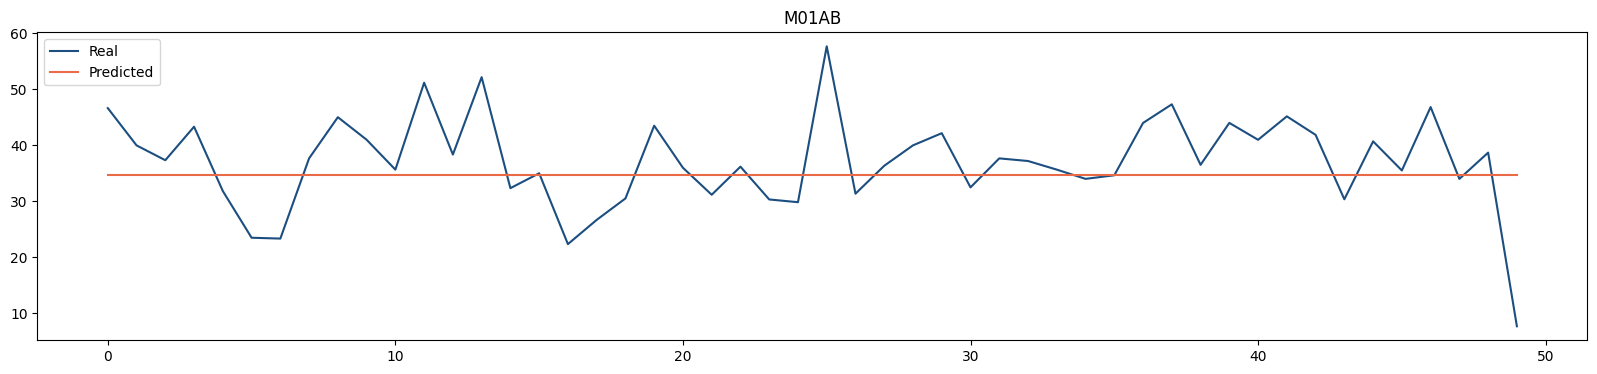

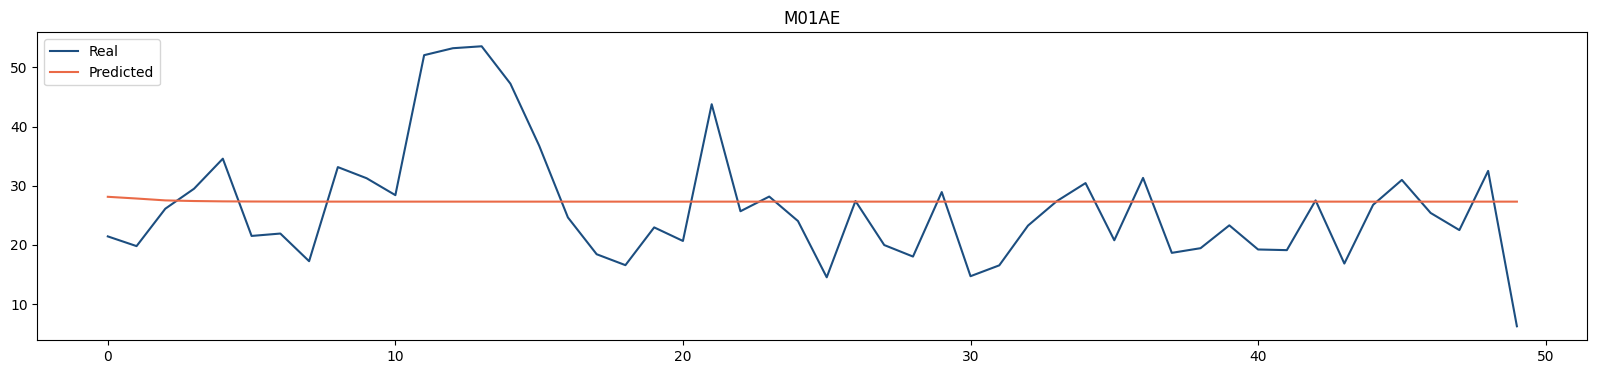

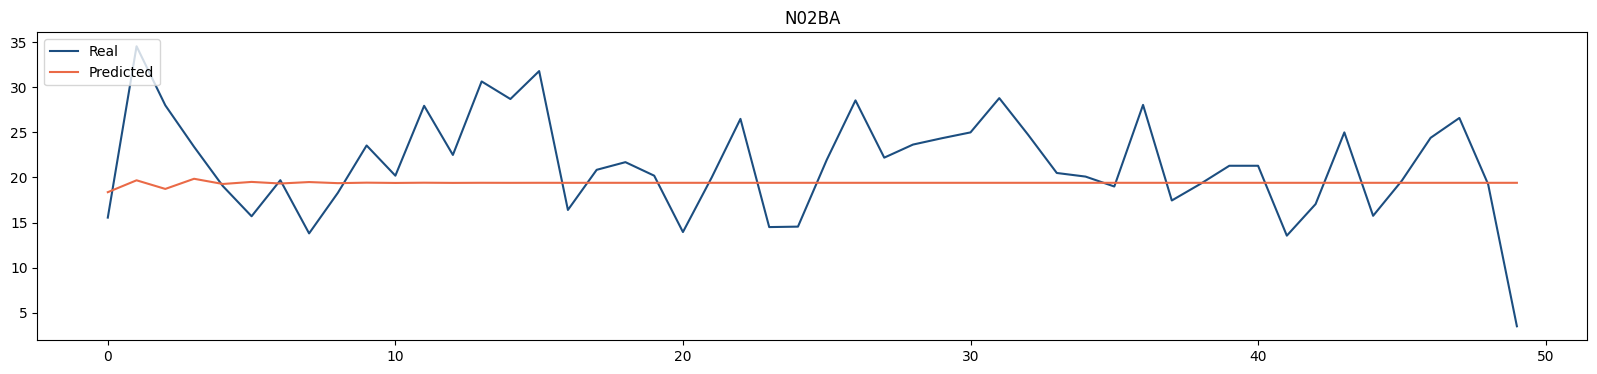

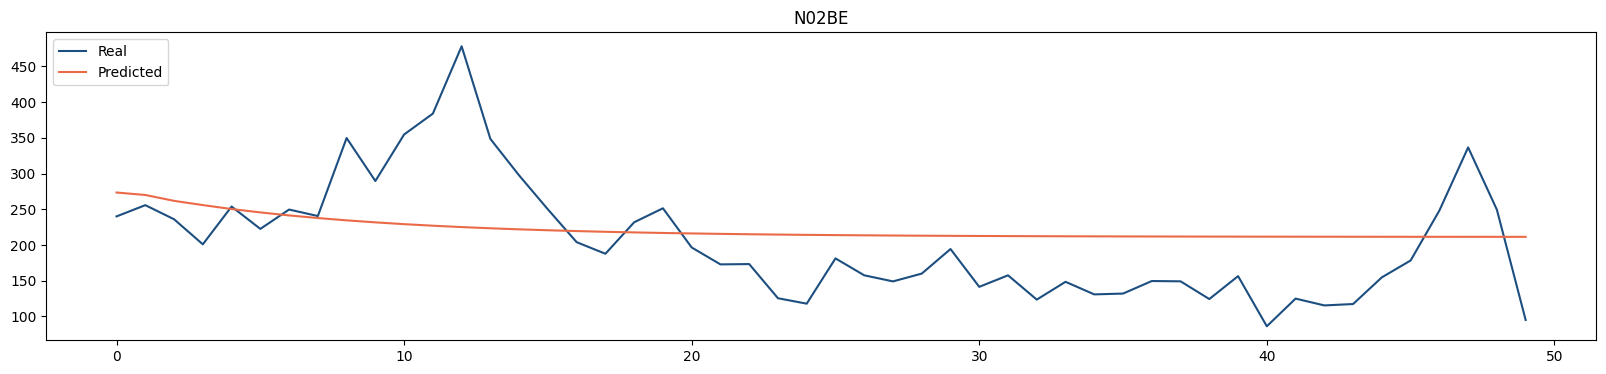

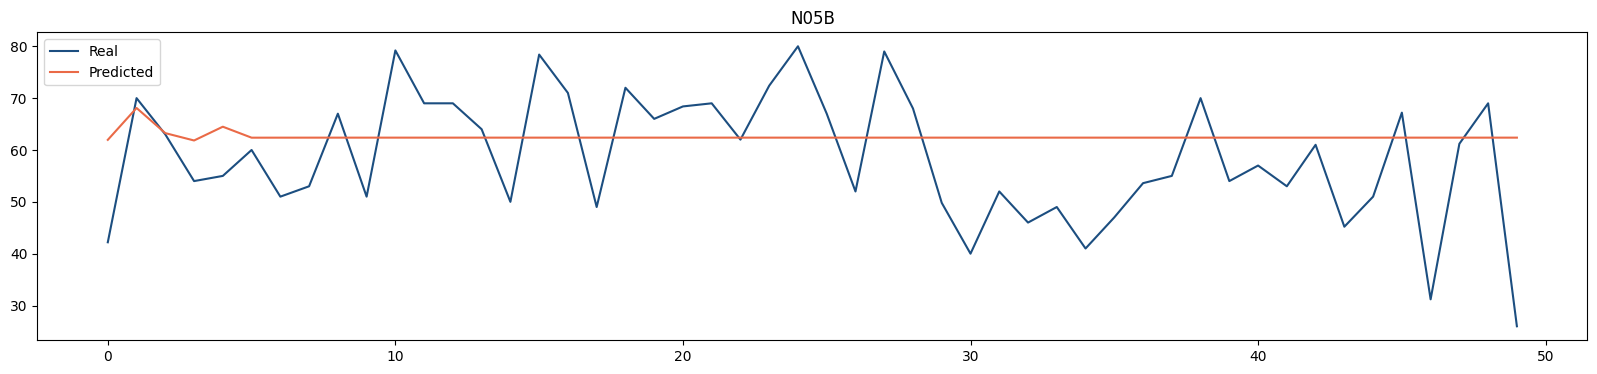

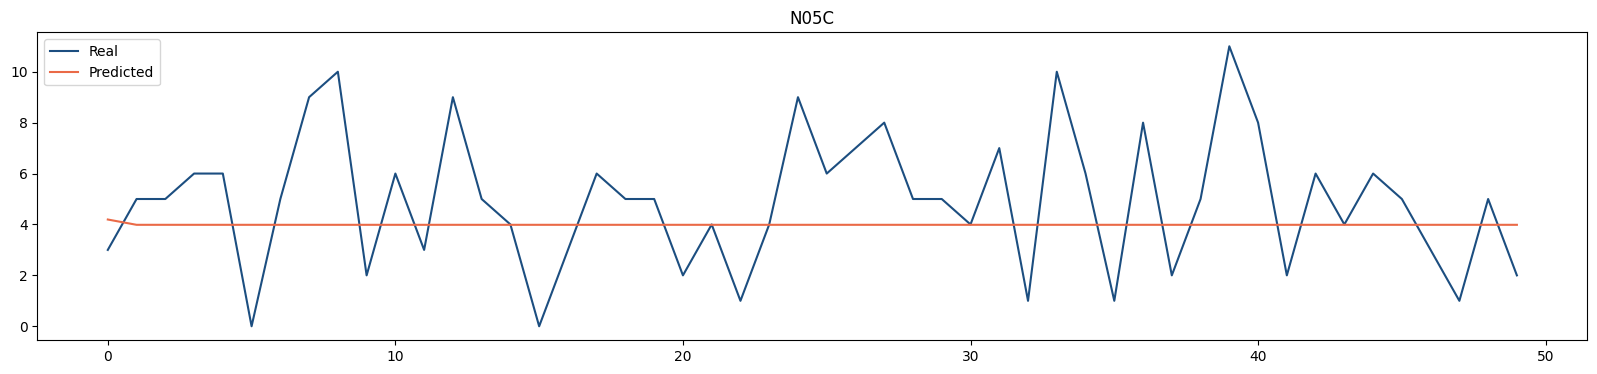

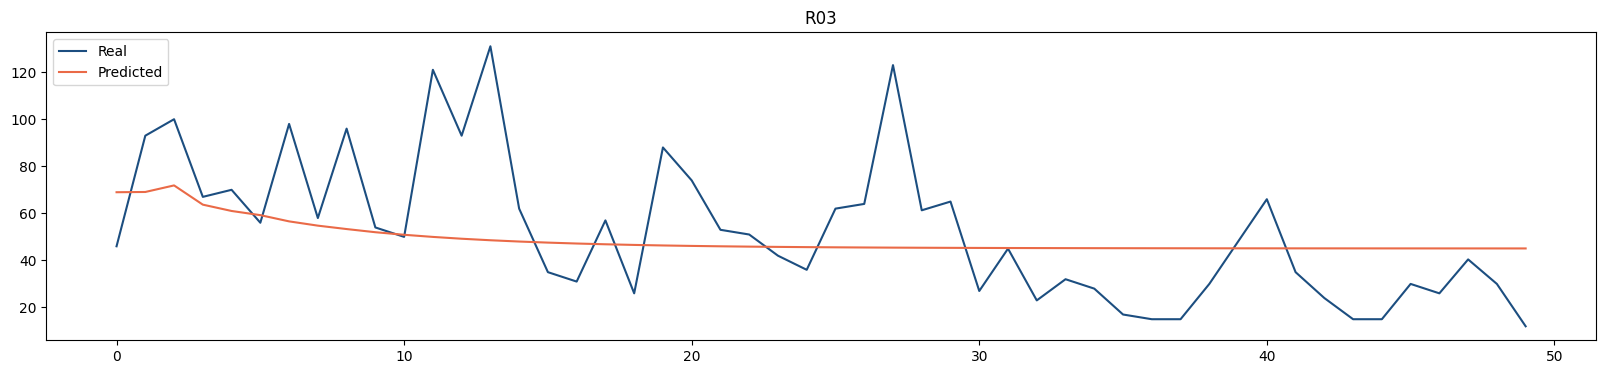

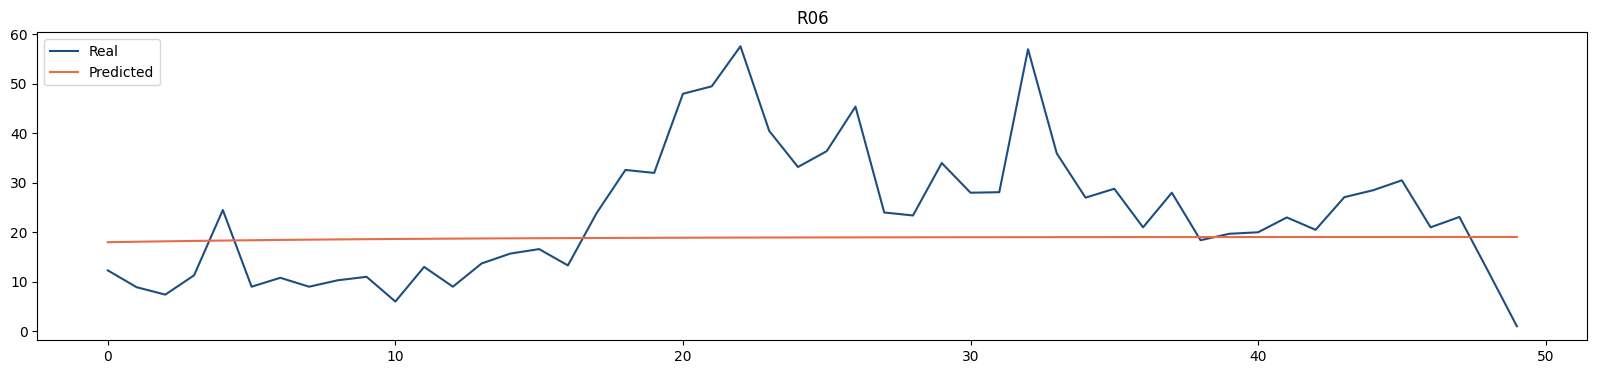

In [66]:

import statsmodels.api as sm

arima = pd.DataFrame(index=weekly_test_data.index)

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':2,'d':0,'q':0}
N02BA= {'series':'N02BA','p':5,'d':1,'q':1}
N02BE= {'series':'N02BE','p':2,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':5}
N05C= {'series':'N05C','p':0,'d':0,'q':1}
R03= {'series':'R03','p':5,'d':1,'q':1}
R06= {'series':'R06','p':1,'d':0,'q':1}

predictions = {series: [] for series in weekly_level_data.columns}

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    X = weekly_level_data[x['series']].values
    size = len(X) - 50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = sm.tsa.ARIMA(history, order=(x['p'], x['d'], x['q']))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred = output[0]
        predictions.append(pred)  
        act = test[t]
        history.append(pred)# recursive nature of historical data
    arima[x['series']] = predictions
    plt.figure(figsize=(20, 4))
    plt.title(x['series'])
    plt.plot(test, color='#1C4E80', label='Real')
    plt.plot(predictions, color='#EA6A47', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()


**Holt Winters forecasting**

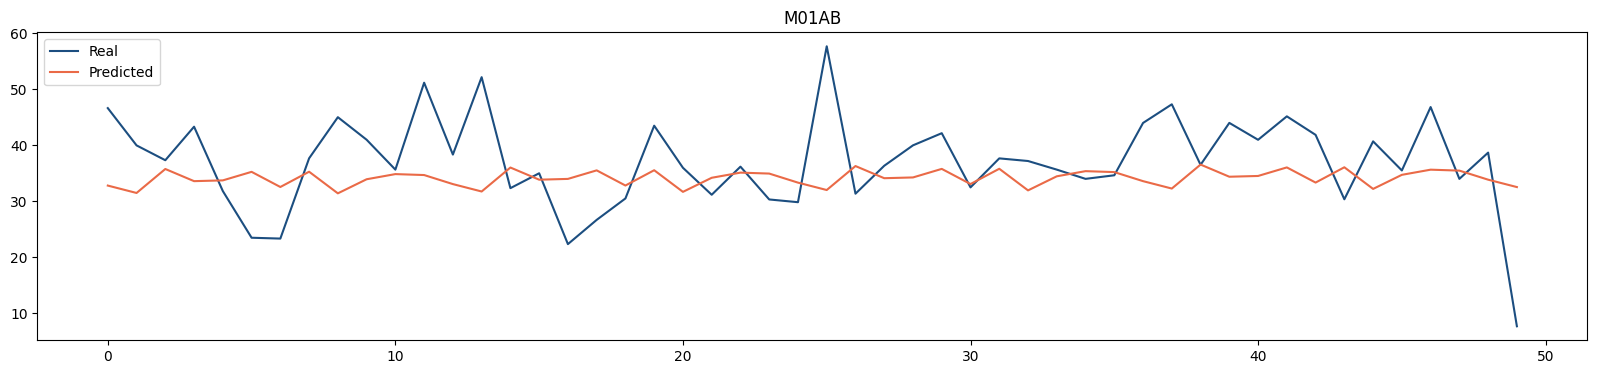

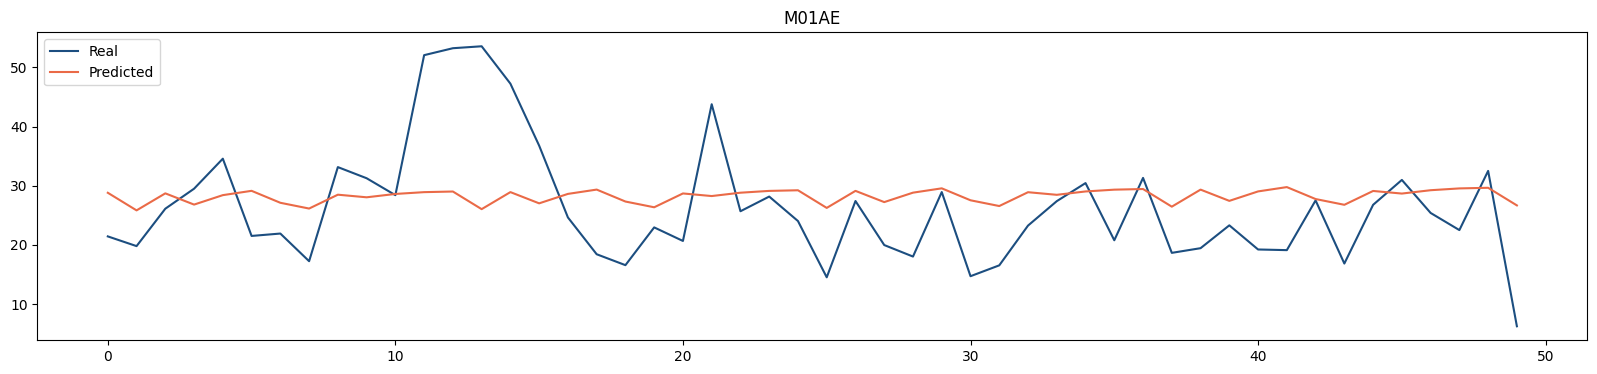

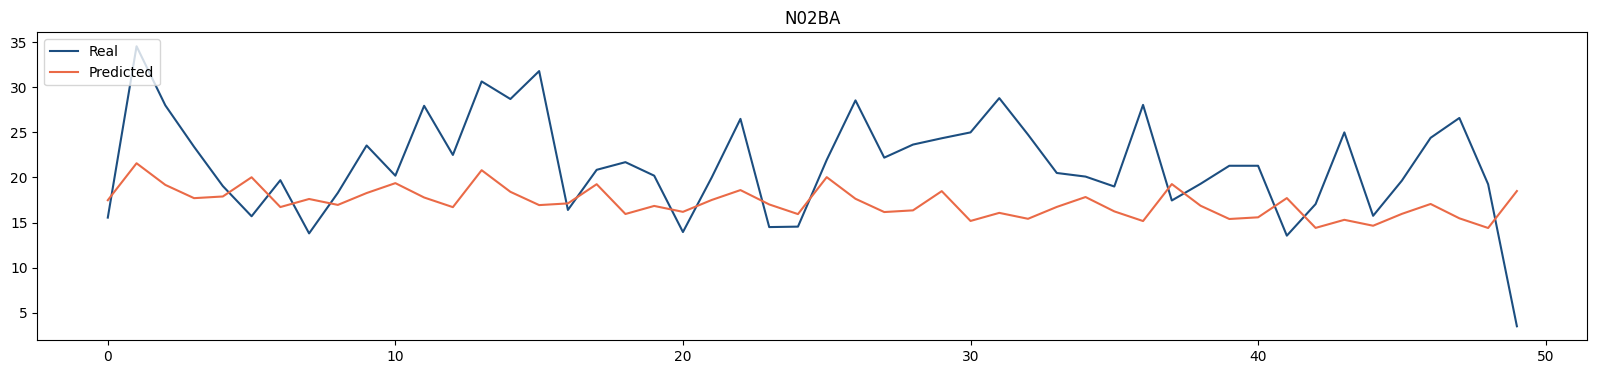

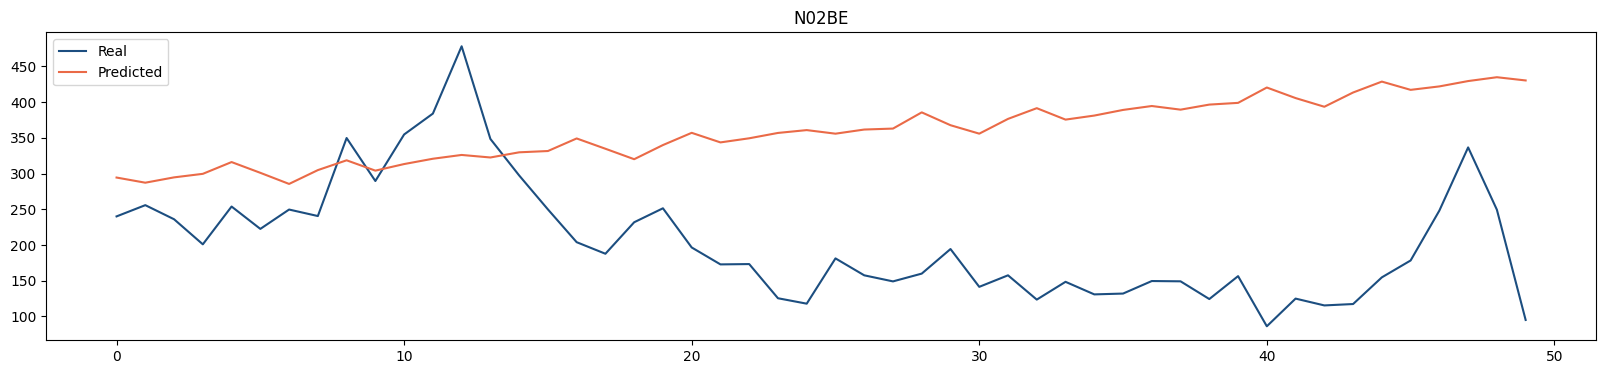

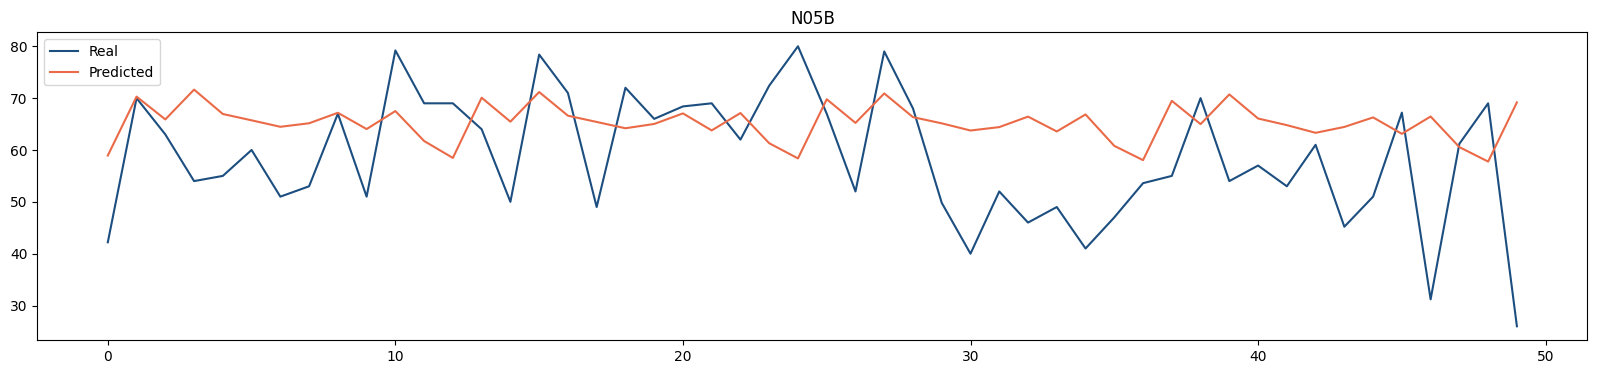

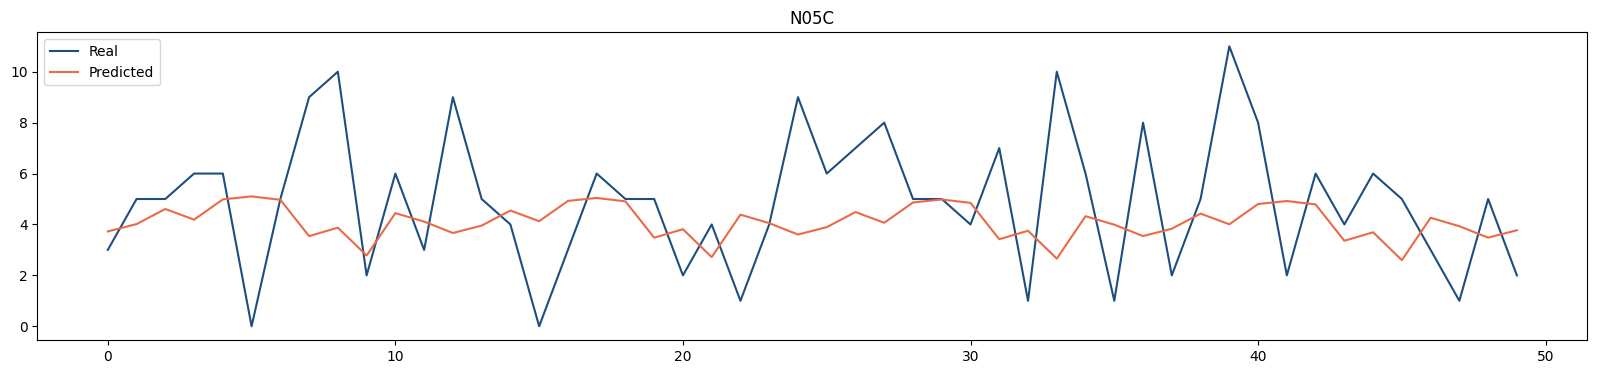

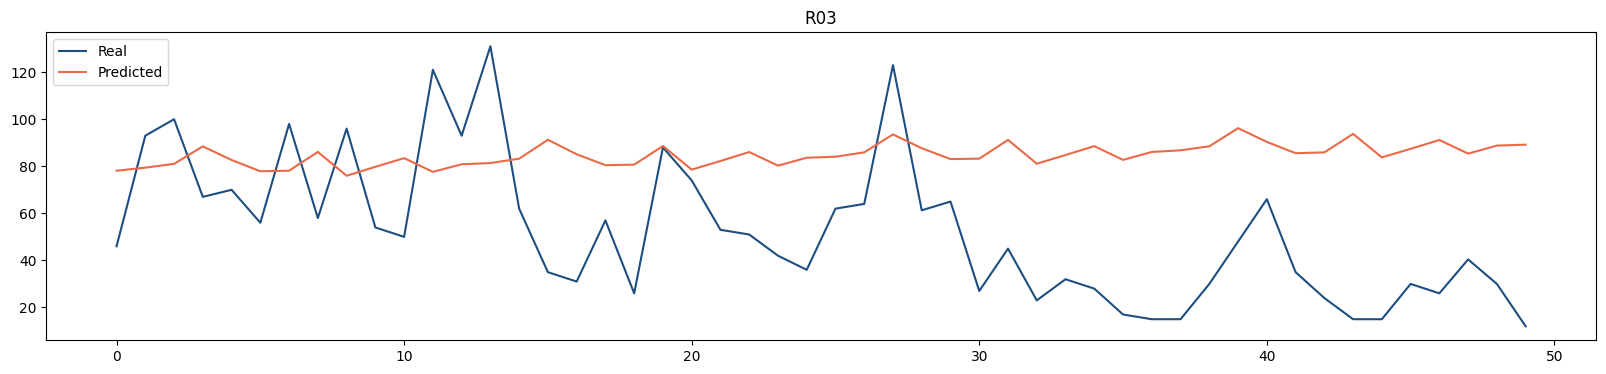

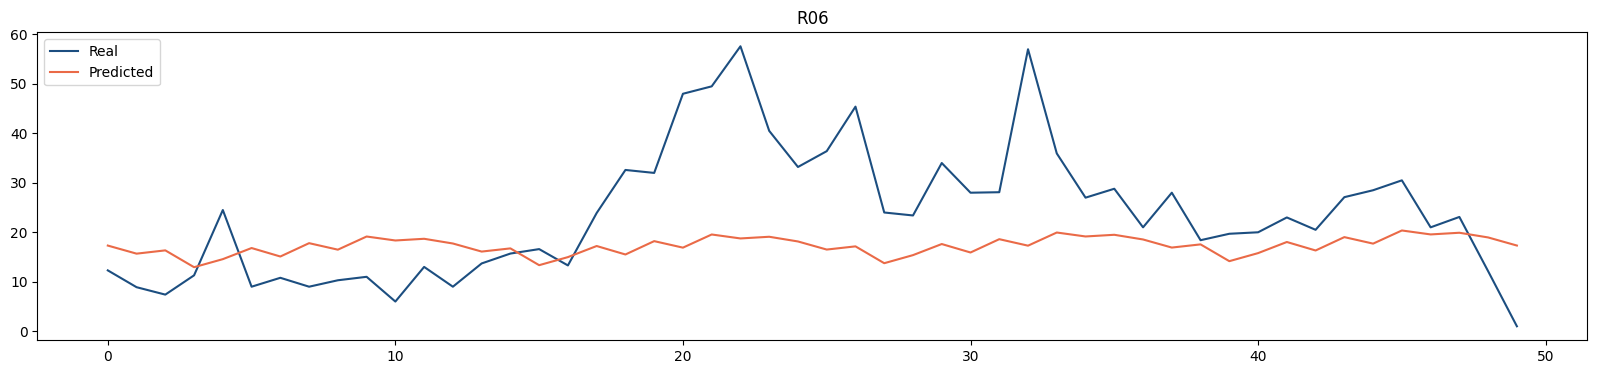

In [67]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = pd.DataFrame(index=weekly_test_data.index)

M01AB= {'series':'M01AB','p':0,'d':0,'q':0,'seasonal_periods': 12}
M01AE= {'series':'M01AE','p':2,'d':0,'q':0,'seasonal_periods': 12}
N02BA= {'series':'N02BA','p':5,'d':1,'q':1,'seasonal_periods': 12}
N02BE= {'series':'N02BE','p':2,'d':0,'q':0,'seasonal_periods': 12}
N05B= {'series':'N05B','p':0,'d':0,'q':5,'seasonal_periods': 12}
N05C= {'series':'N05C','p':0,'d':0,'q':1,'seasonal_periods': 12}
R03= {'series':'R03','p':5,'d':1,'q':1,'seasonal_periods': 12}
R06= {'series':'R06','p':1,'d':0,'q':1,'seasonal_periods': 12}


predictions = {series: [] for series in weekly_level_data.columns}

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    X = weekly_level_data[x['series']].values
    size = len(X) - 50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ExponentialSmoothing(history, trend='add', seasonal='add', seasonal_periods=x['seasonal_periods'])
        model_fit = model.fit()
        output = model_fit.forecast()
        pred = output[0]
        predictions.append(pred)  
        act = test[t]
        history.append(pred)# recursive nature of historical data
    hw[x['series']] = predictions
    plt.figure(figsize=(20, 4))
    plt.title(x['series'])
    plt.plot(test, color='#1C4E80', label='Real')
    plt.plot(predictions, color='#EA6A47', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()


**XG Boost**

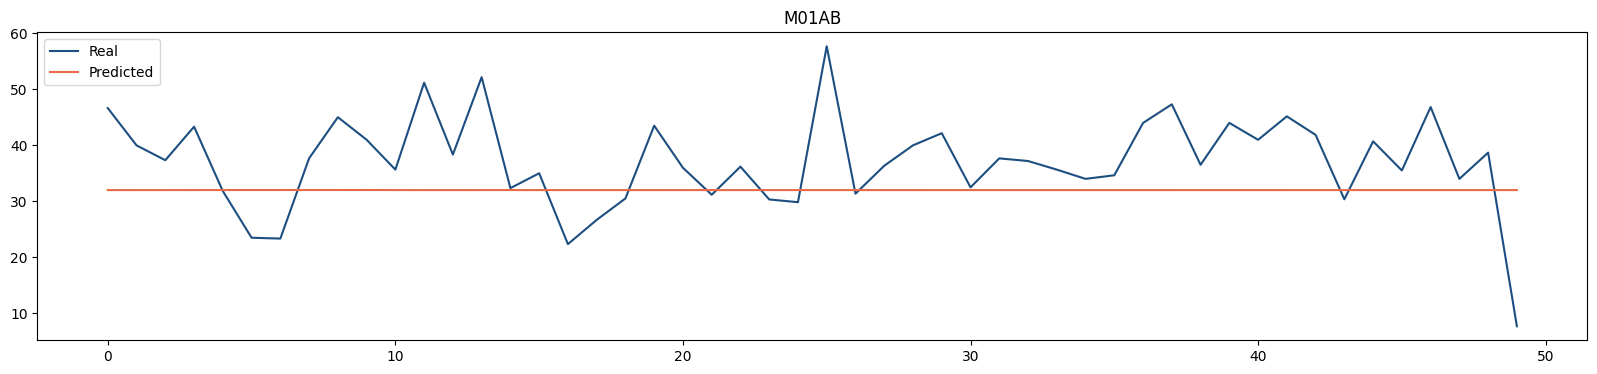

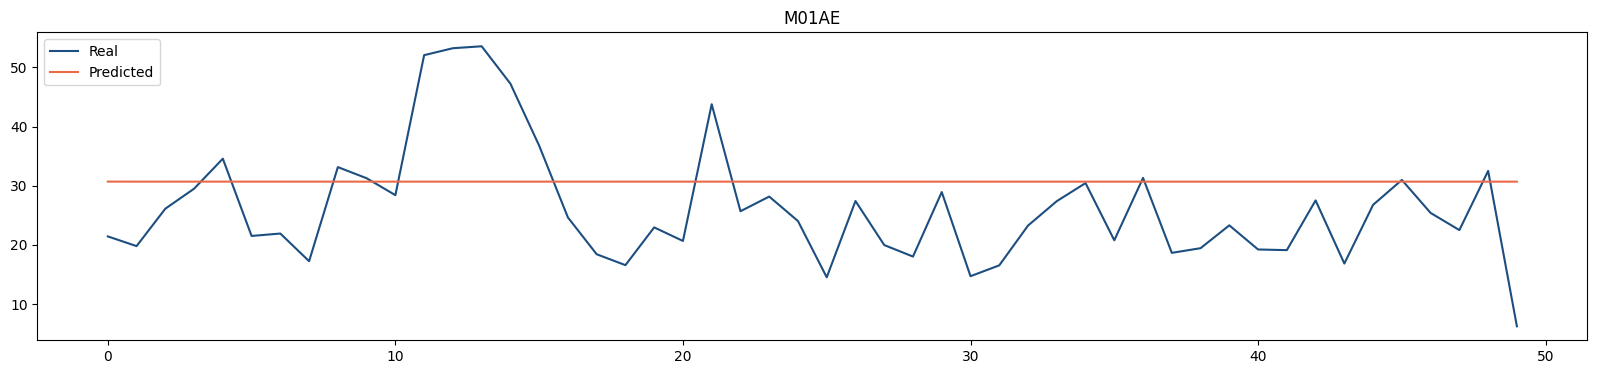

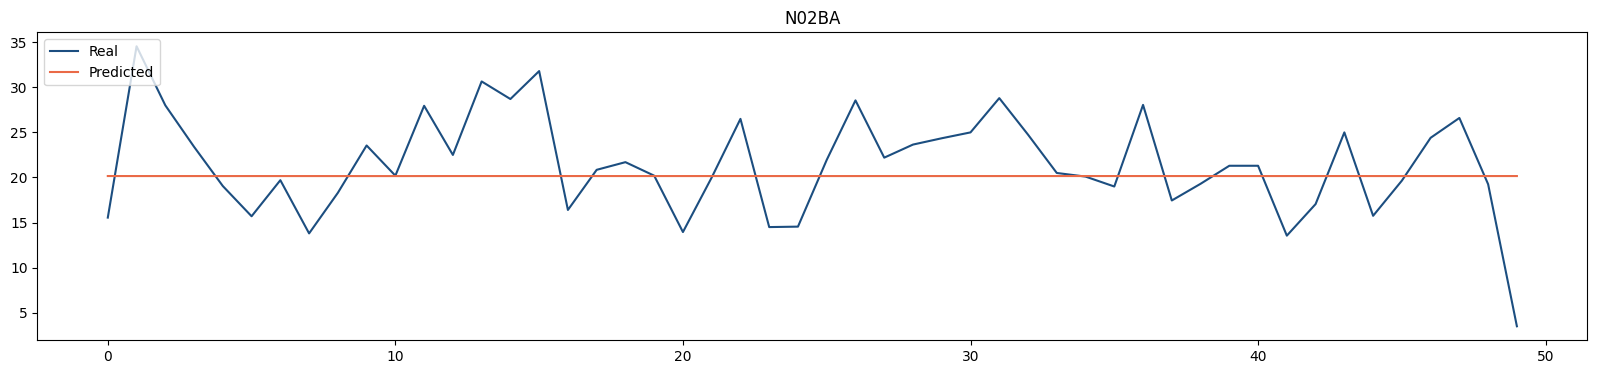

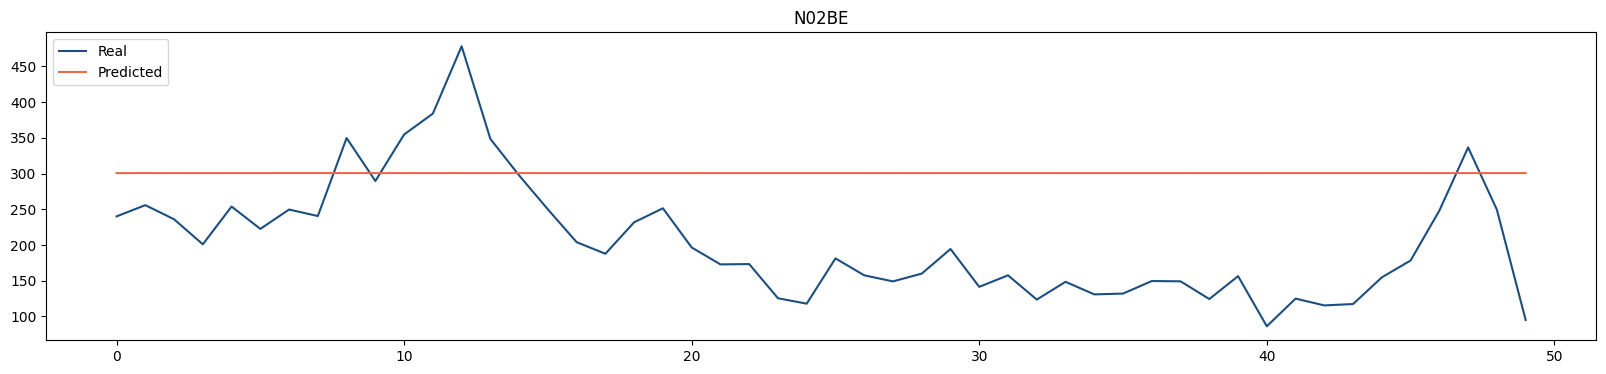

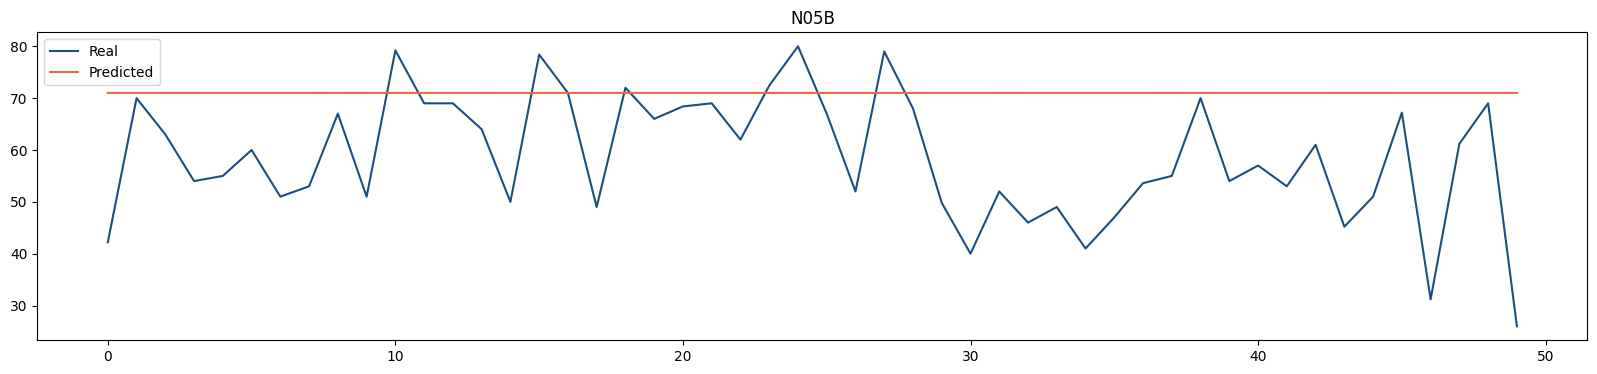

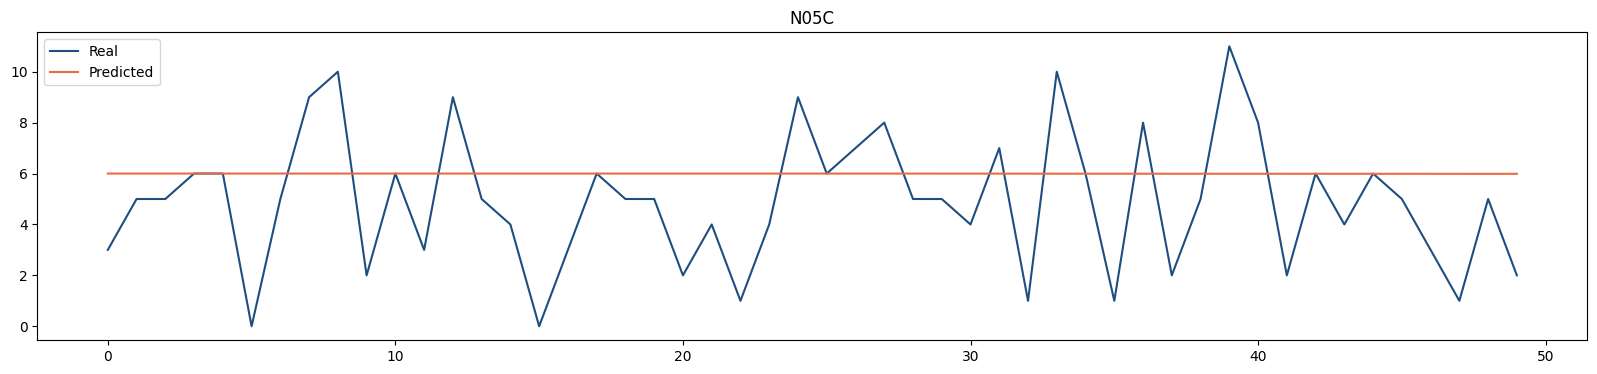

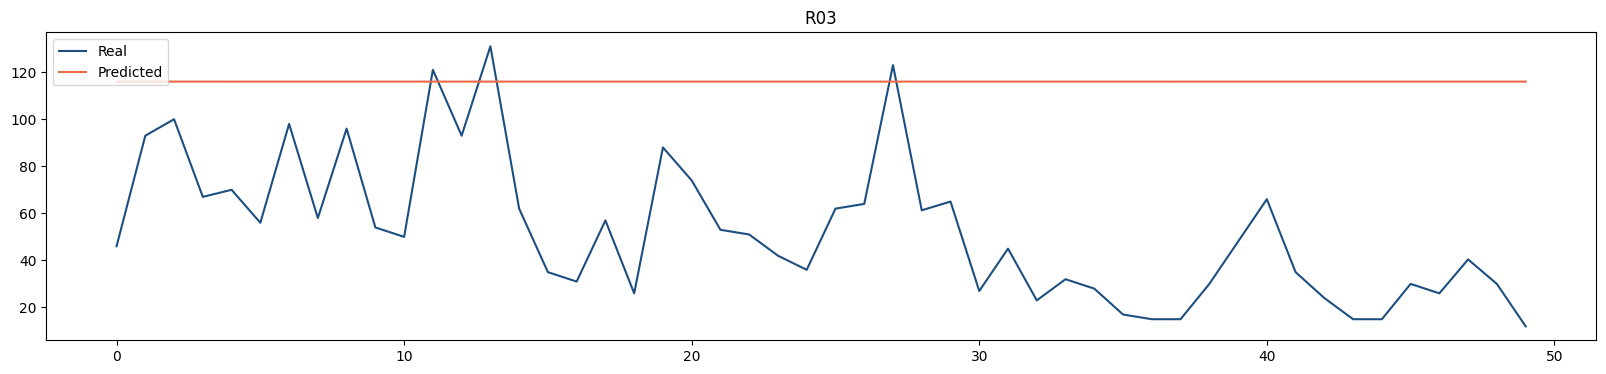

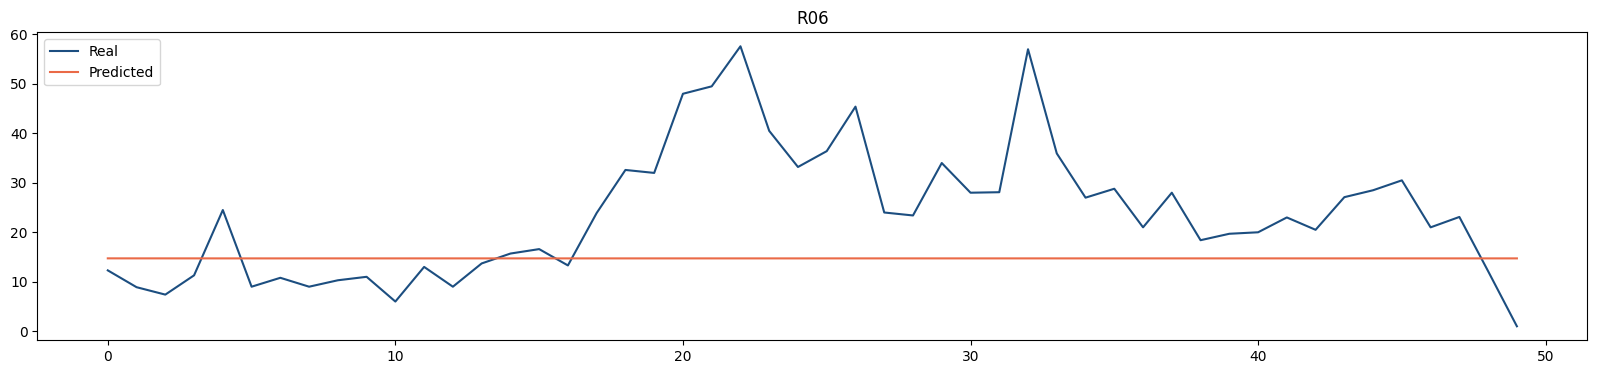

In [68]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

xgboost = pd.DataFrame(index=weekly_test_data.index)

target_variables = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for x in target_variables:
    target_data = weekly_level_data[x].values
    target_array = np.array(target_data)
    train = target_array[:-50]
    test = target_array[-50:]
    history = train.tolist()
    preds = []
    
    # Add lag variables to the training data
    for t in range(len(test)):
        lag_vars = history[-252:]  # Use the last 4 observed values as lag variables
        xgb_model = xgb.XGBRegressor()
        xgb_model.fit(np.array(lag_vars).reshape(-1, 1), train[-len(lag_vars):])
        pred = xgb_model.predict(np.array([history[-1]]).reshape(1, -1))[0]
        preds.append(pred)
        history.append(pred)
        train = np.append(train, pred)
    
    xgboost[x]=preds
    plt.figure(figsize=(20, 4))
    plt.title(x)
    plt.plot(test, color='#1C4E80', label='Real')
    plt.plot(preds, color='#EA6A47', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()


**Random Forest Regressor**

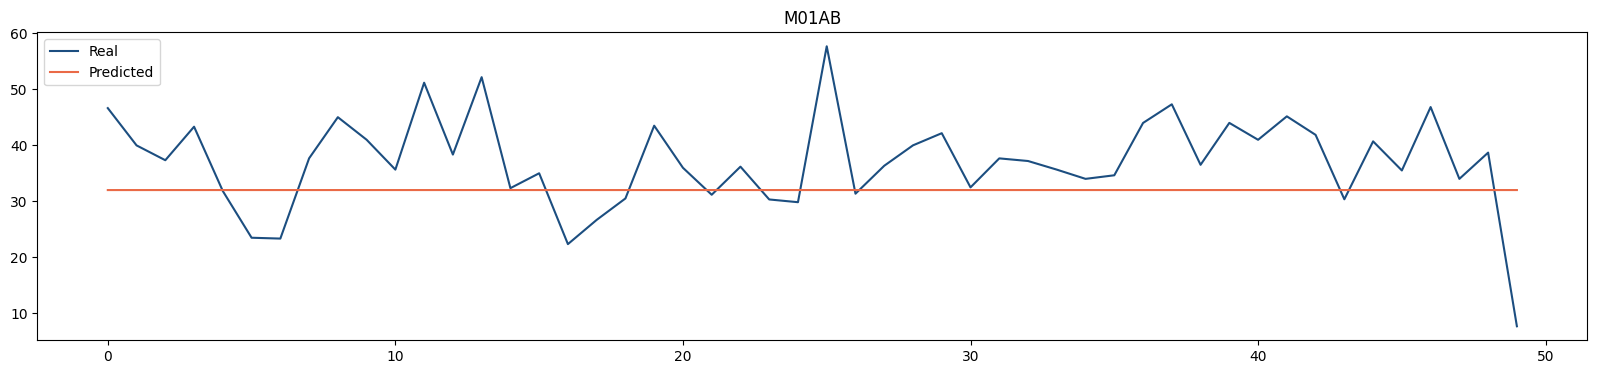

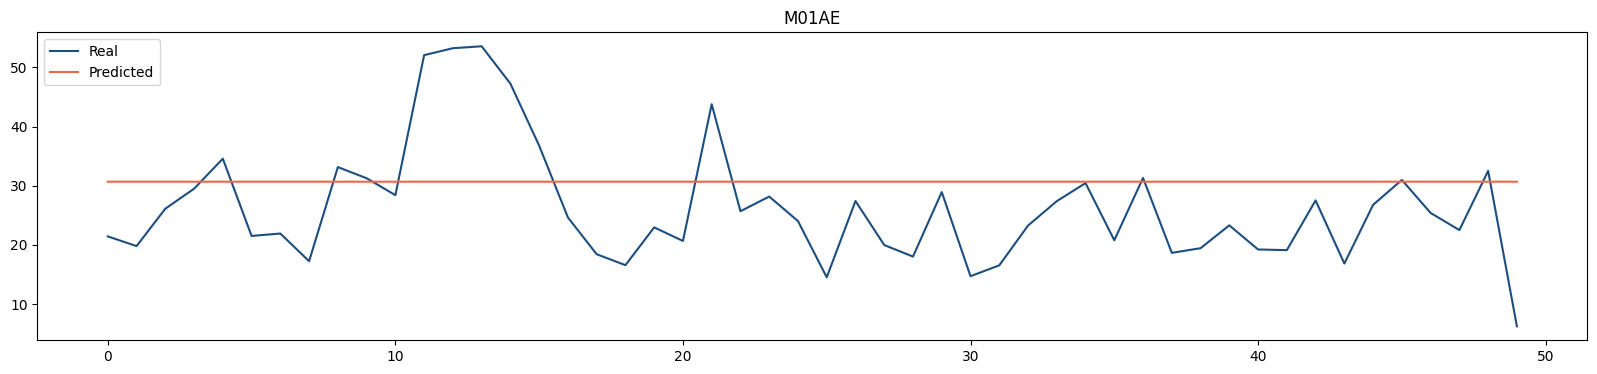

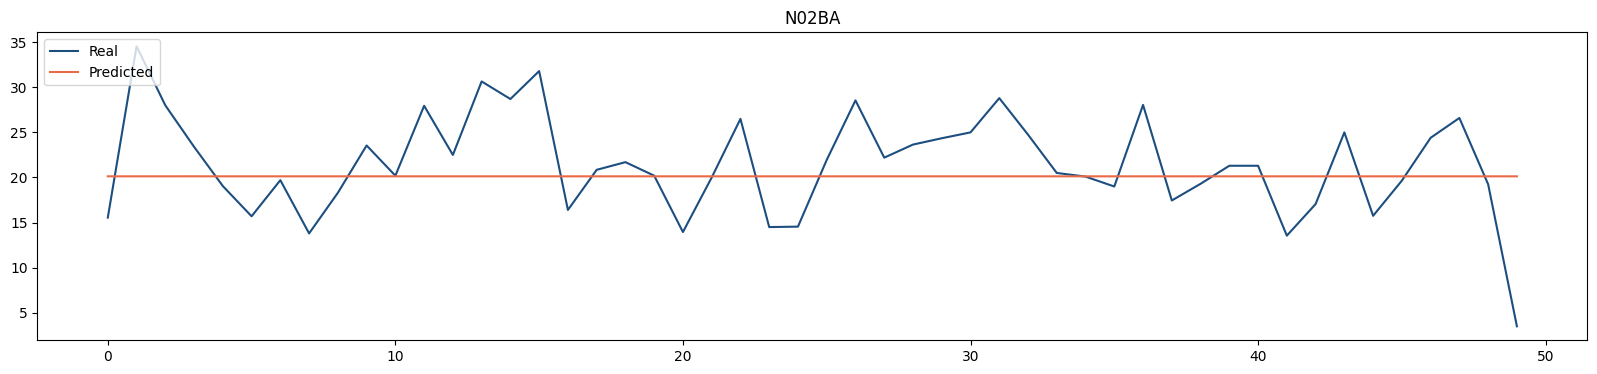

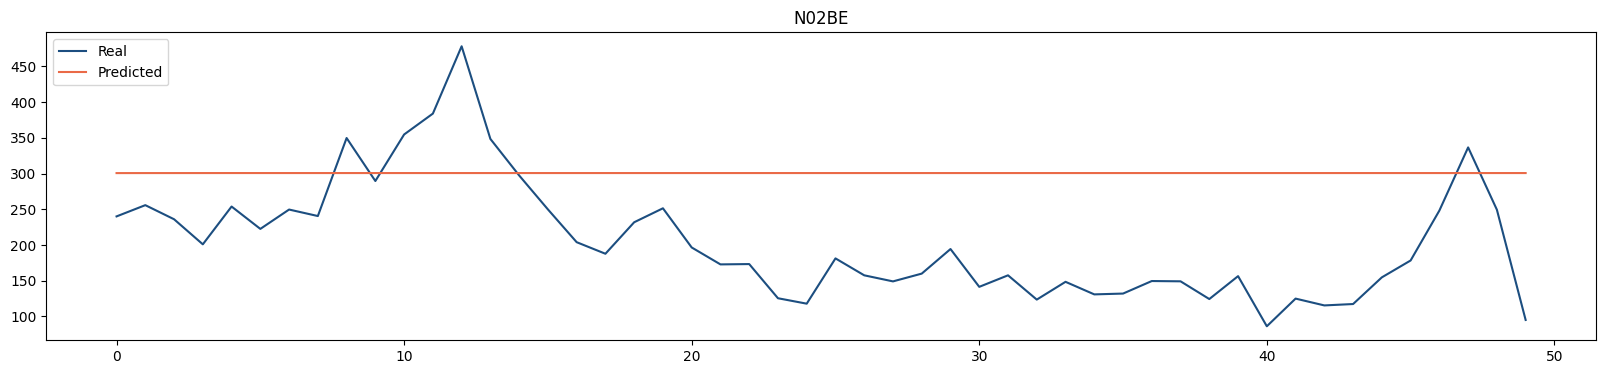

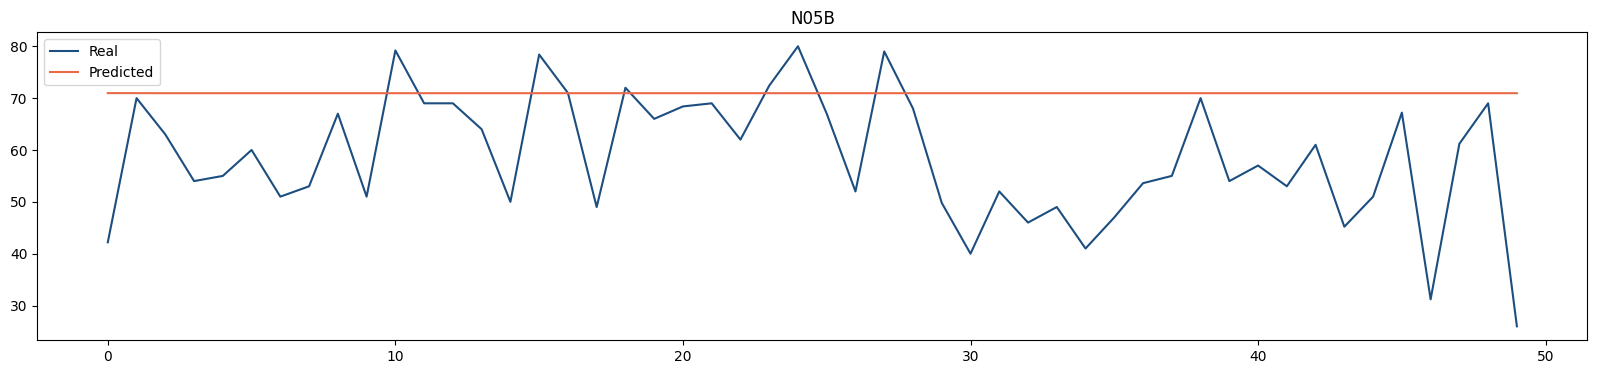

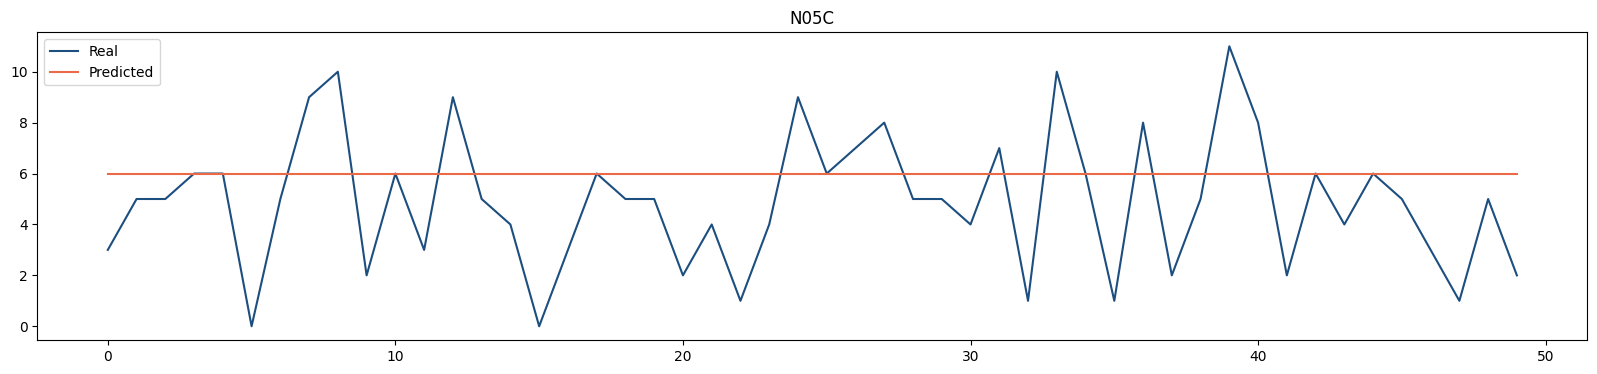

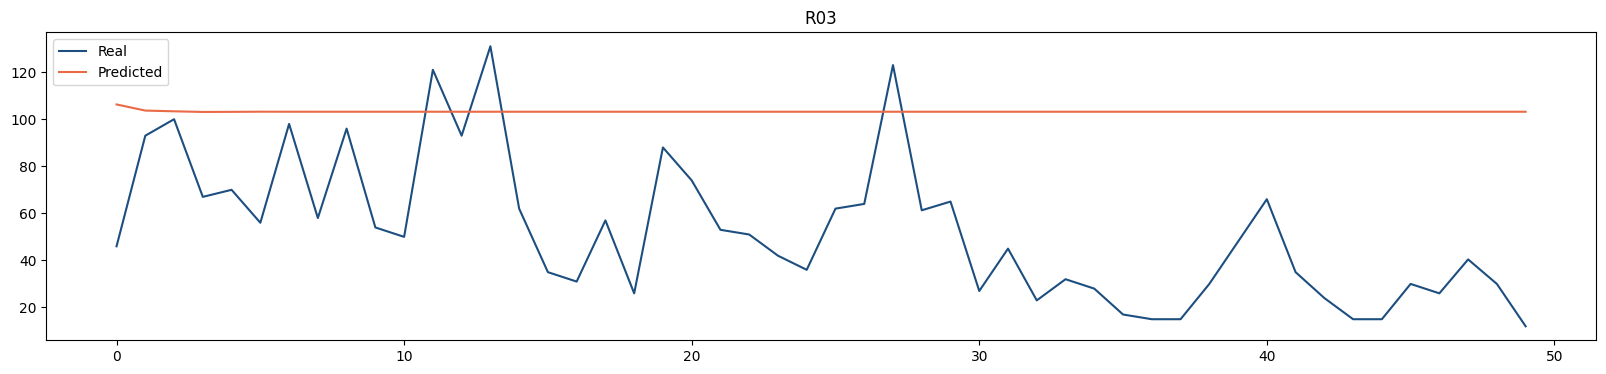

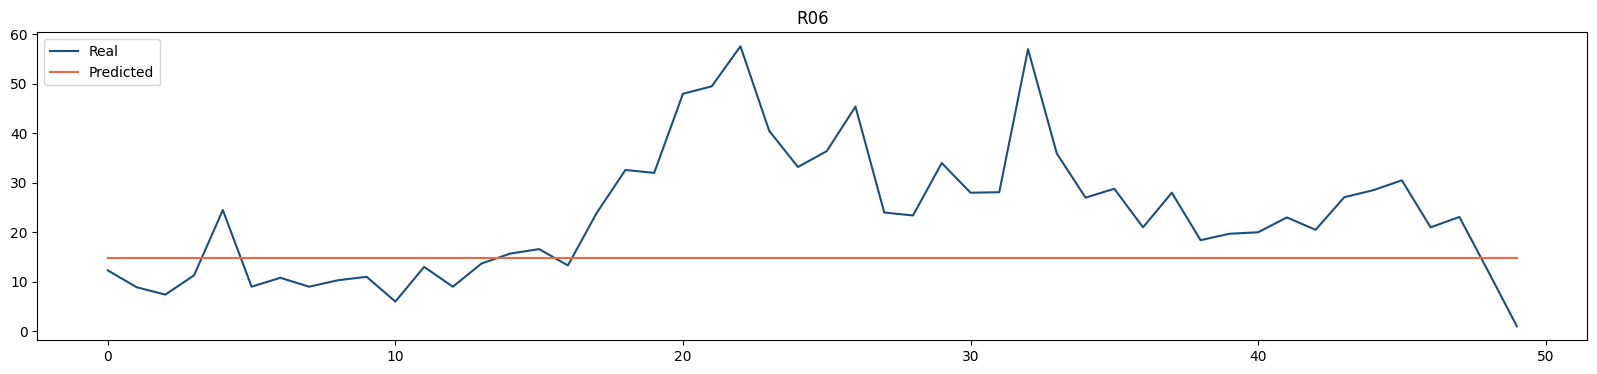

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = pd.DataFrame(index=weekly_test_data.index)
target_variables = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']


for x in target_variables:

    target_data = weekly_level_data[x].values
    target_array = np.array(target_data)

    train = target_array[:-50]
    test = target_array[-50:]
    
    history = train.tolist()
    preds = []
    
    for t in range(len(test)):
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(np.array(history).reshape(-1, 1), train)
        pred = model.predict(np.array([history[-1]]).reshape(1, -1))[0]
        preds.append(pred)
        history.append(pred)
        train = np.append(train, pred)
    
    rf[x]=preds
    plt.figure(figsize=(20, 4))
    plt.title(x)
    plt.plot(test, color='#1C4E80', label='Real')
    plt.plot(preds, color='#EA6A47', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()


**Benchmarking using a simple moving average and the seasonal Naive method**

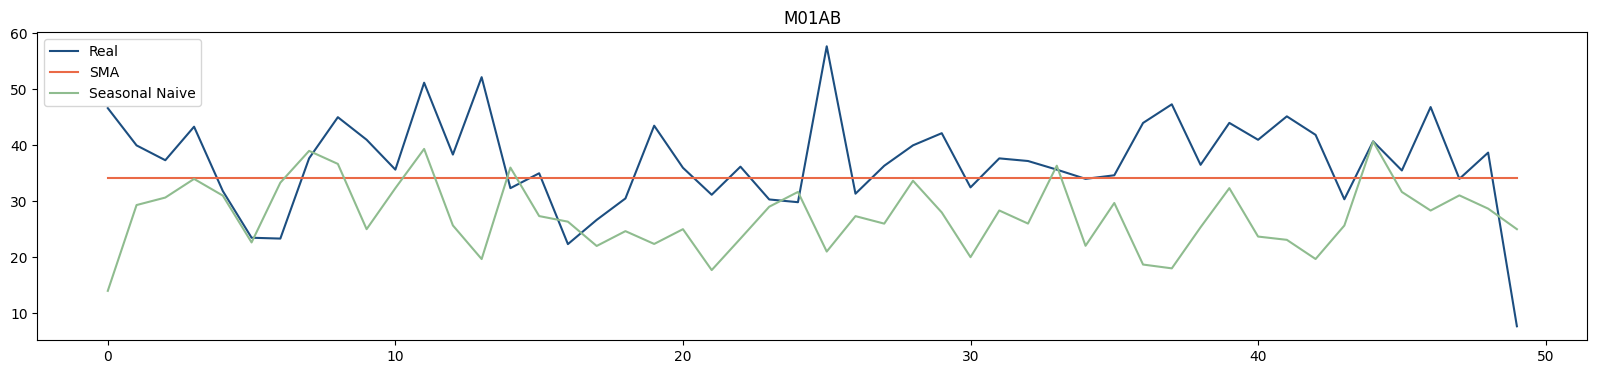

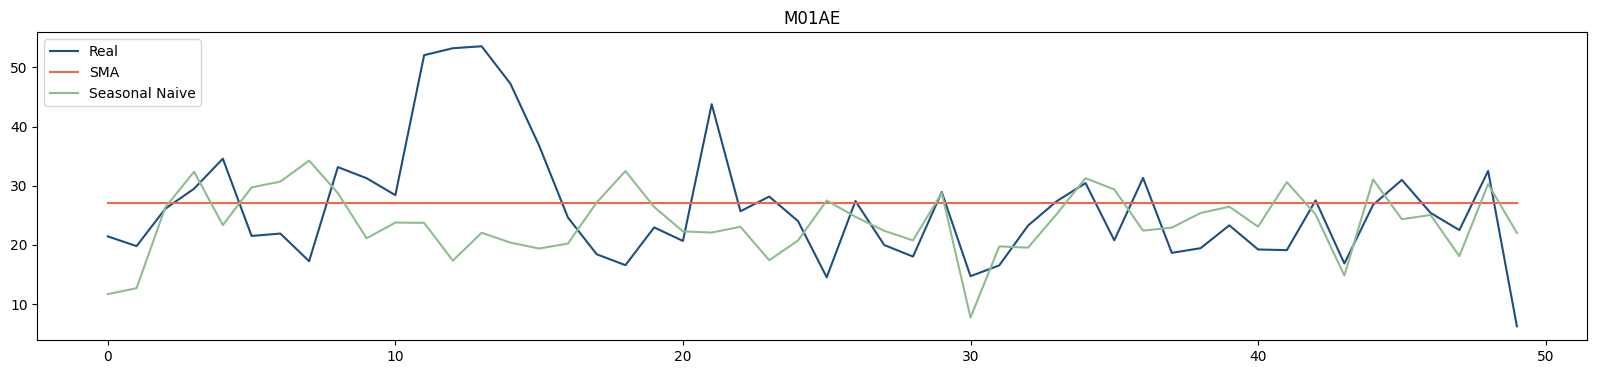

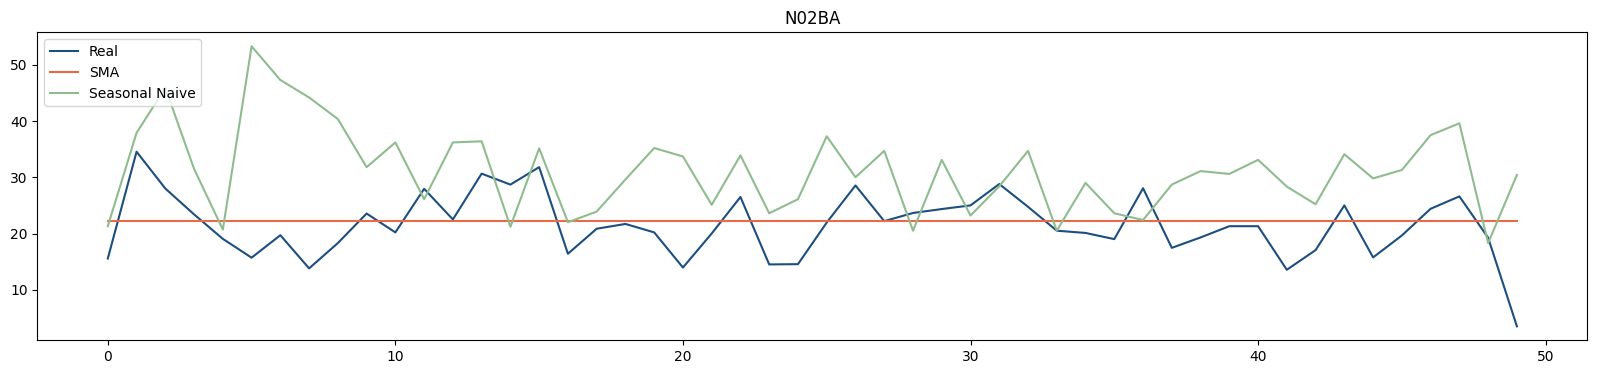

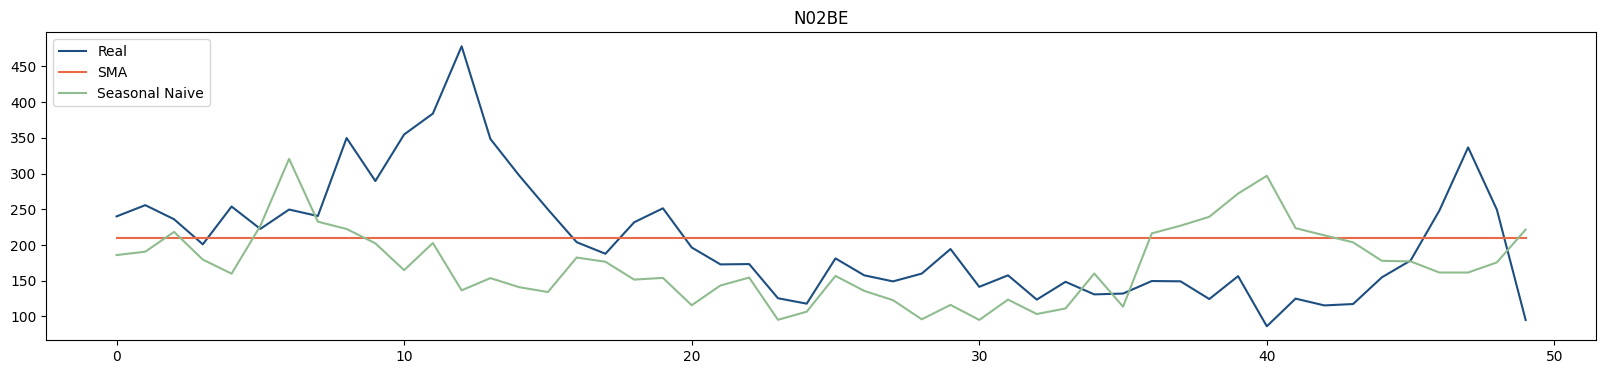

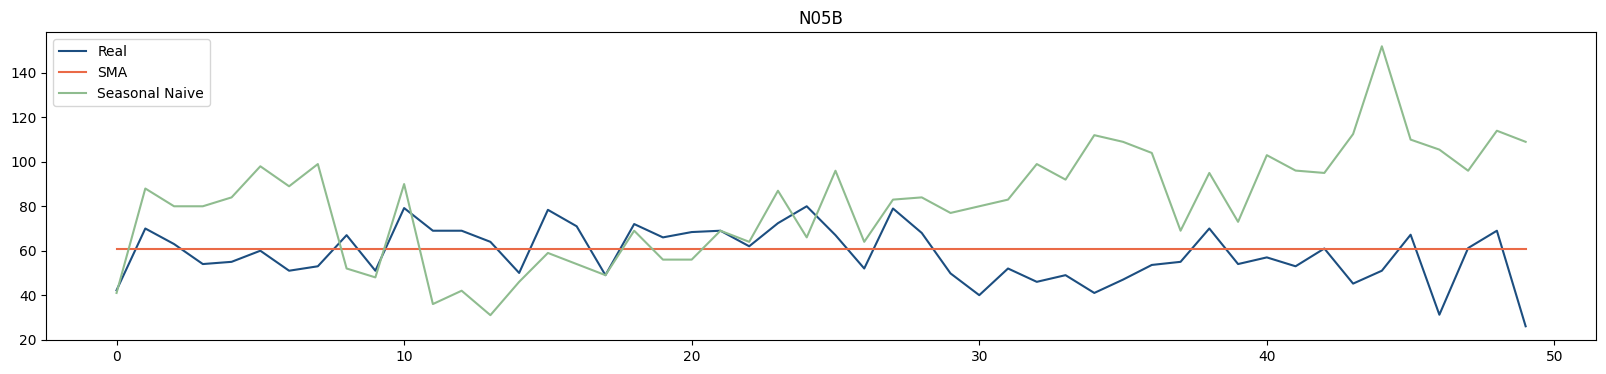

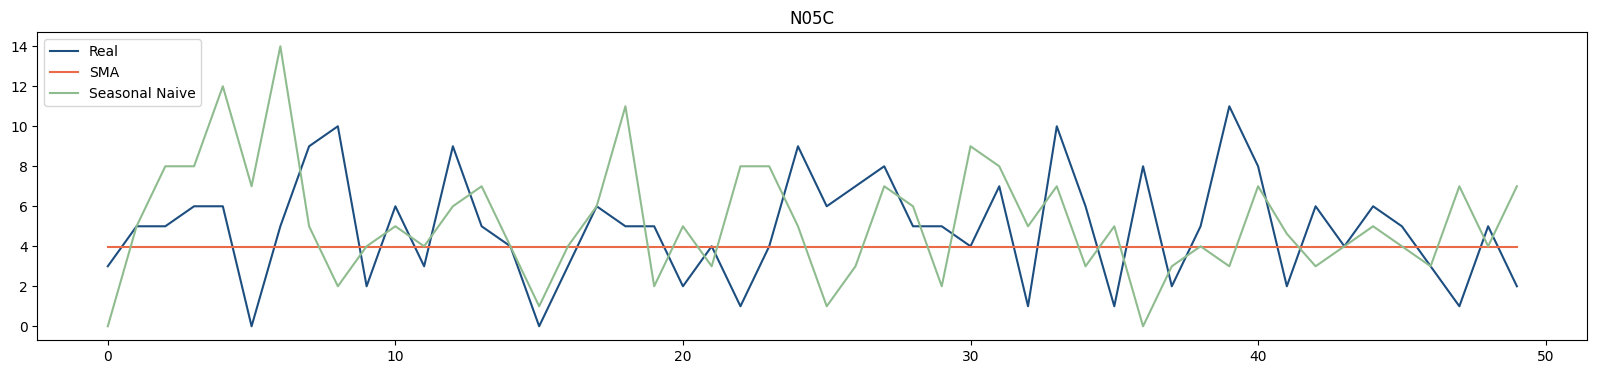

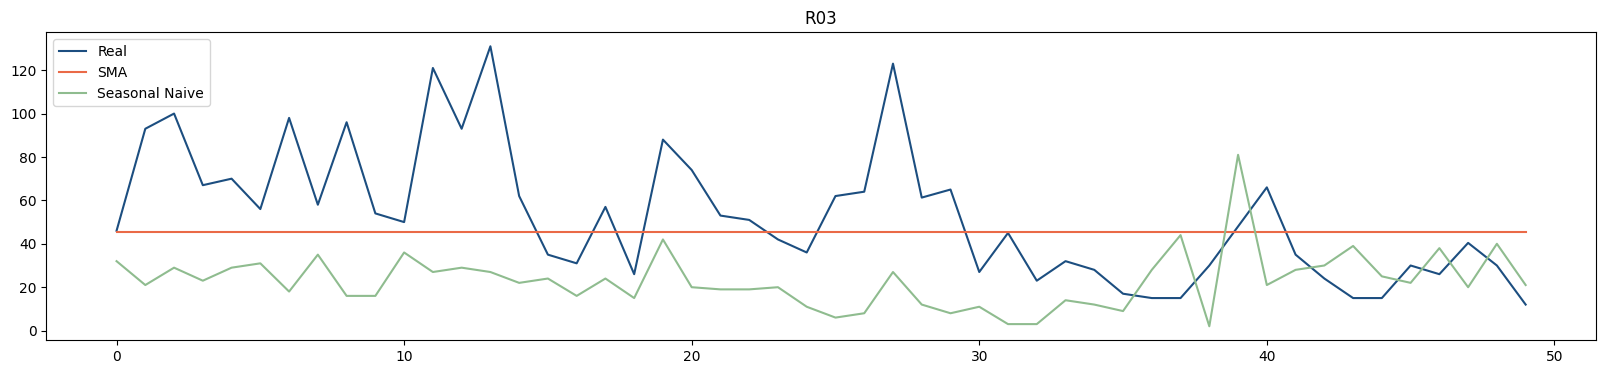

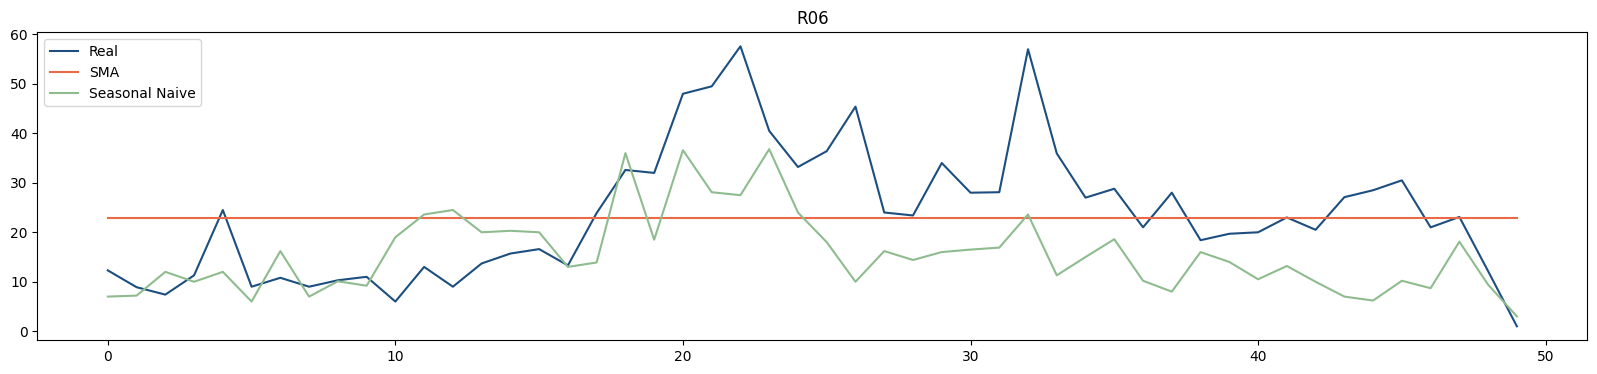

In [70]:

sma = pd.DataFrame(index=weekly_test_data.index)
snaive=pd.DataFrame(index=weekly_test_data.index)
target_variables = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for x in target_variables:
    target_data = weekly_level_data[x].values
    target_array = np.array(target_data)

    train = target_array[:-50]
    test = target_array[-50:]

    
    window_size = 52 # last year
    sma_preds = pd.Series(train).rolling(window=window_size).mean().iloc[-1]
    sma_preds = np.full(len(test), sma_preds)  # Convert to array

    seasonal_naive_preds = []
    for t in range(len(test)):
        year_offset = (t + len(train)) // len(train)
        last_season_value = train[t - len(train) + (year_offset - 1) * len(train)]
        seasonal_naive_preds.append(last_season_value)

    sma[x] = sma_preds
    snaive[x]=seasonal_naive_preds
    plt.figure(figsize=(20, 4))
    plt.title(x)
    plt.plot(test, color='#1C4E80', label='Real')
    plt.plot(sma_preds, color='#EA6A47', label='SMA')
    plt.plot(seasonal_naive_preds, color='#8FBC8F', label='Seasonal Naive')
    plt.legend(loc='upper left')
    plt.show()

In [71]:
def calculate_mape(actual_values, predicted_values):
    
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    abs_percentage_error = np.abs((actual_values - predicted_values) / actual_values)
    valid_errors = abs_percentage_error[np.isfinite(abs_percentage_error)]
    mape = np.mean(valid_errors) * 100

    return mape

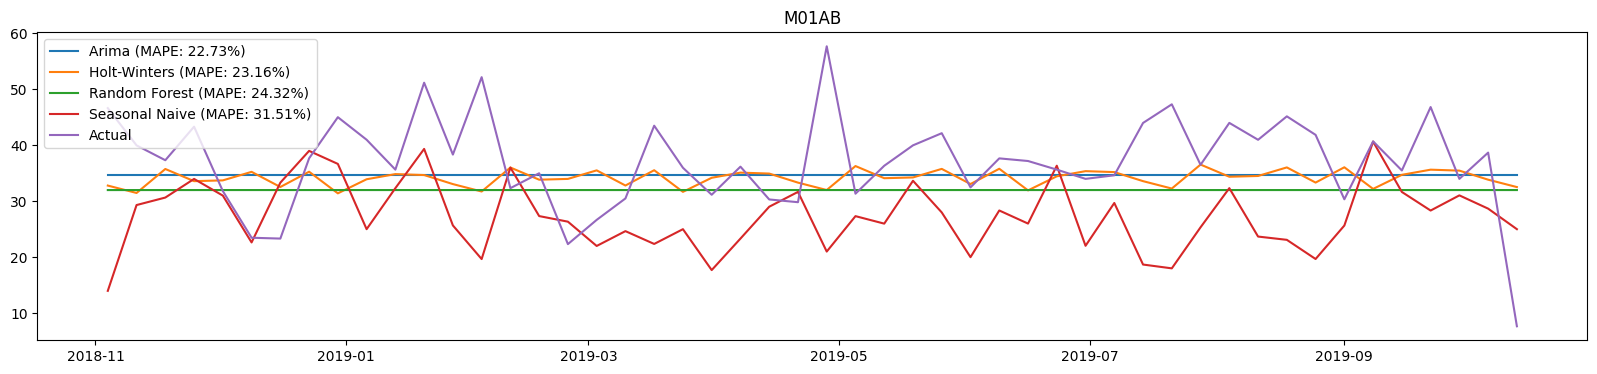

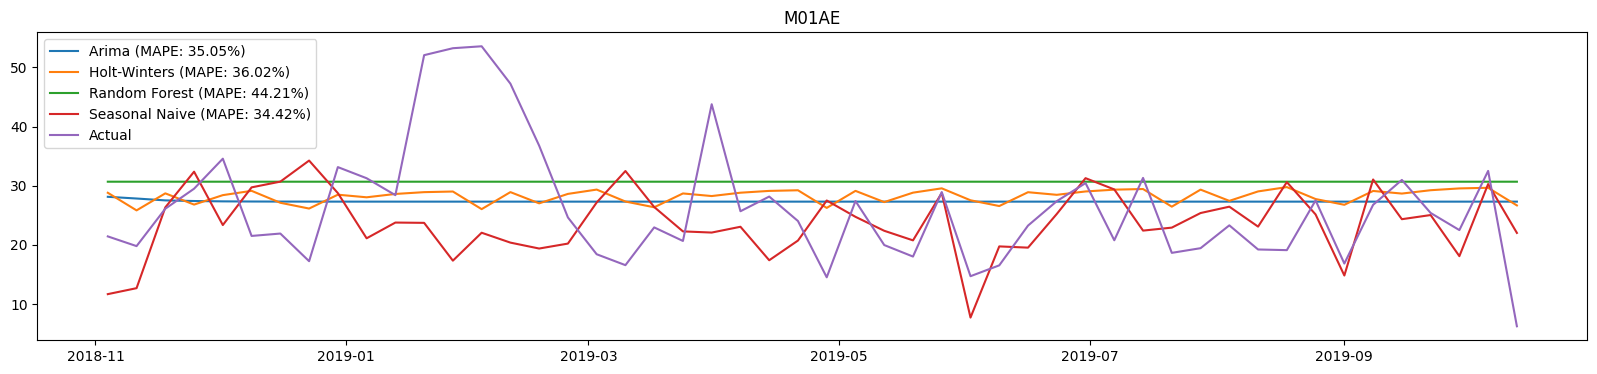

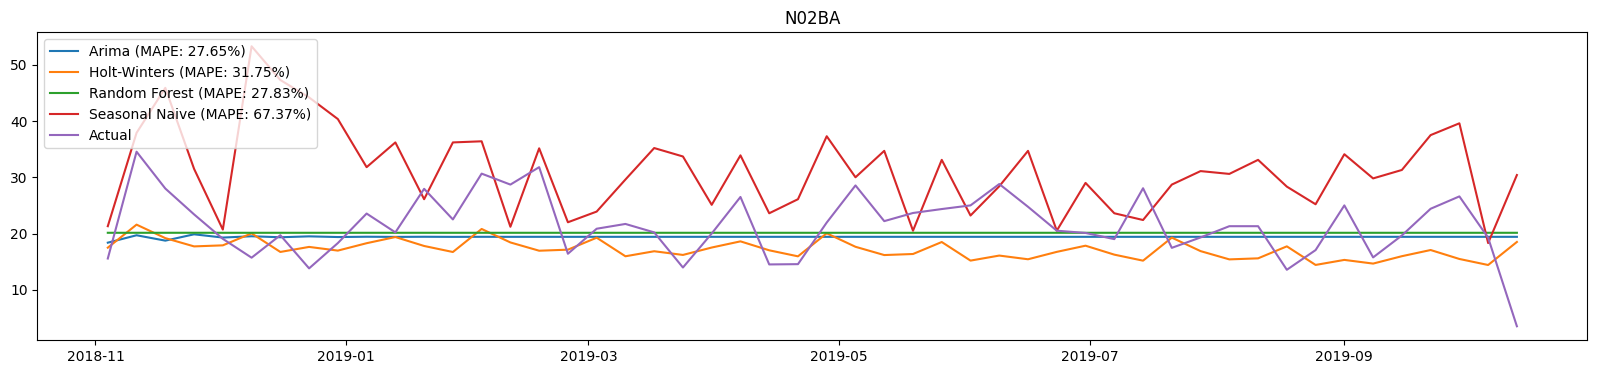

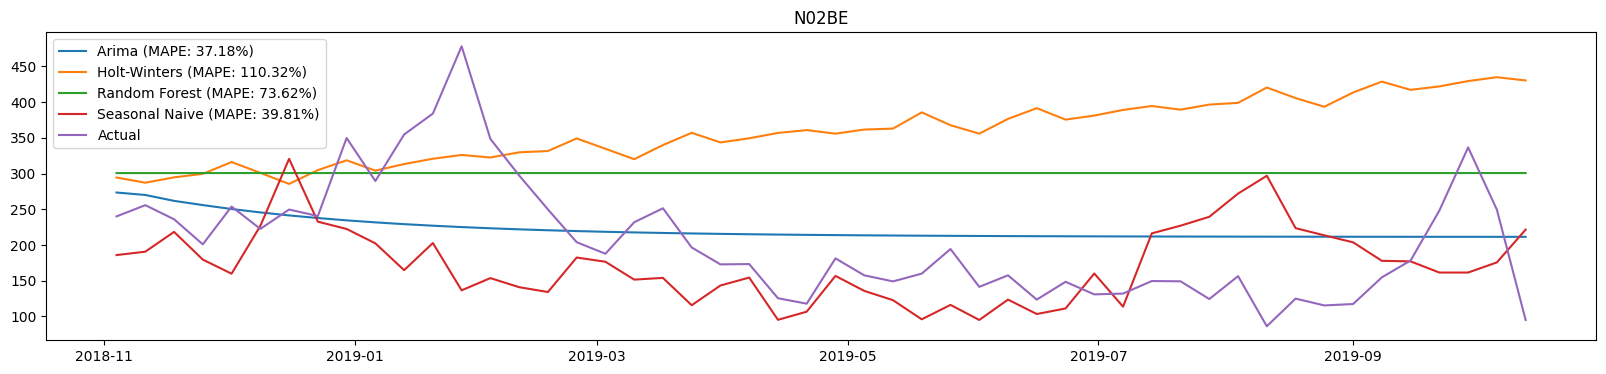

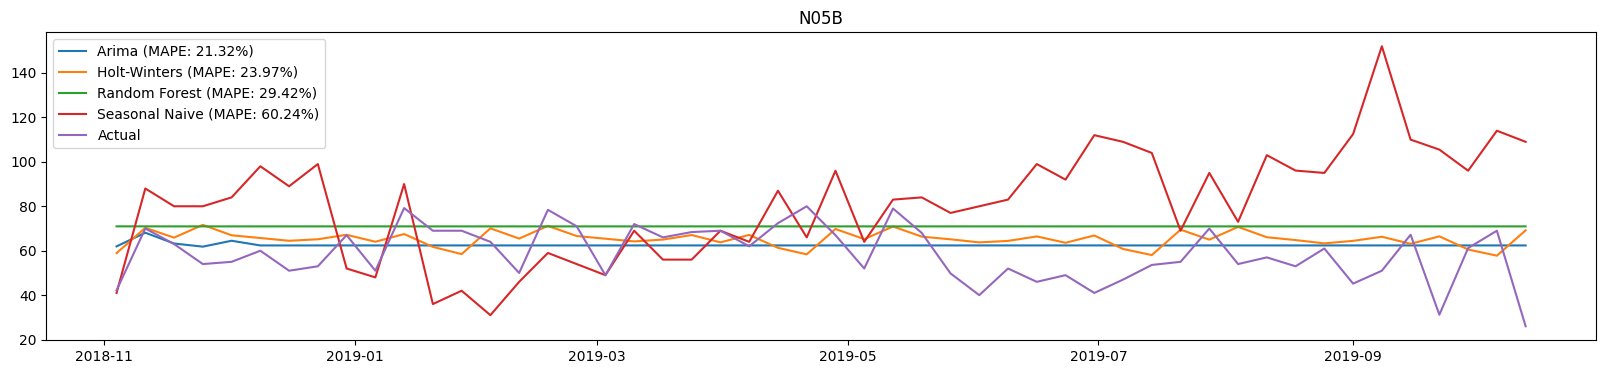

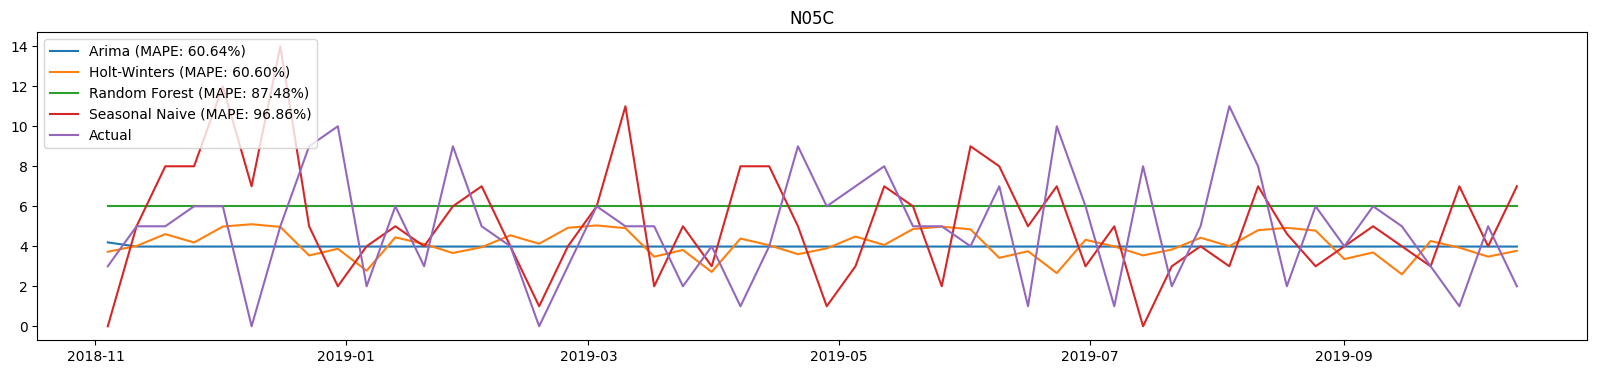

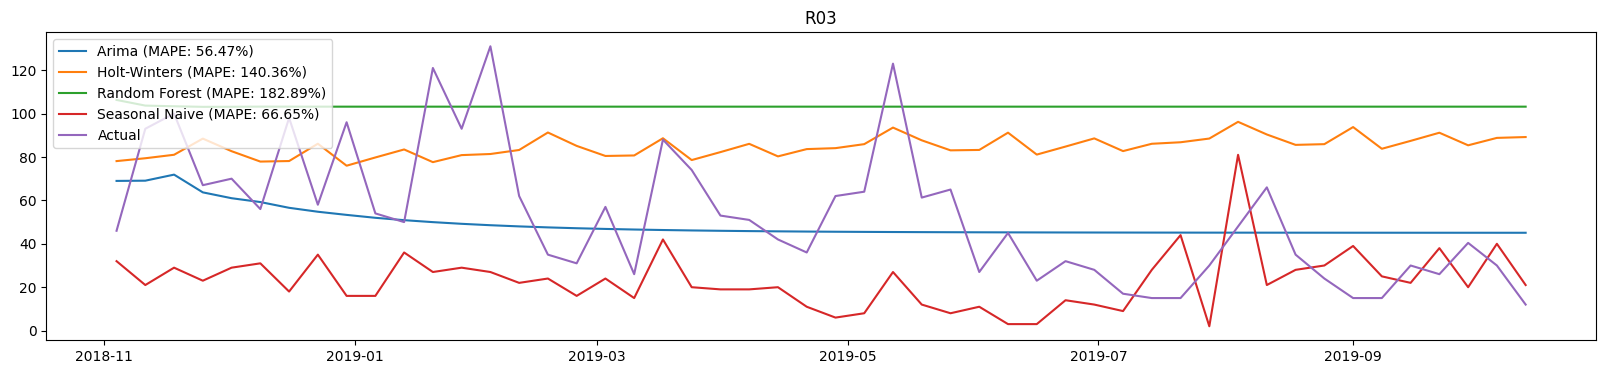

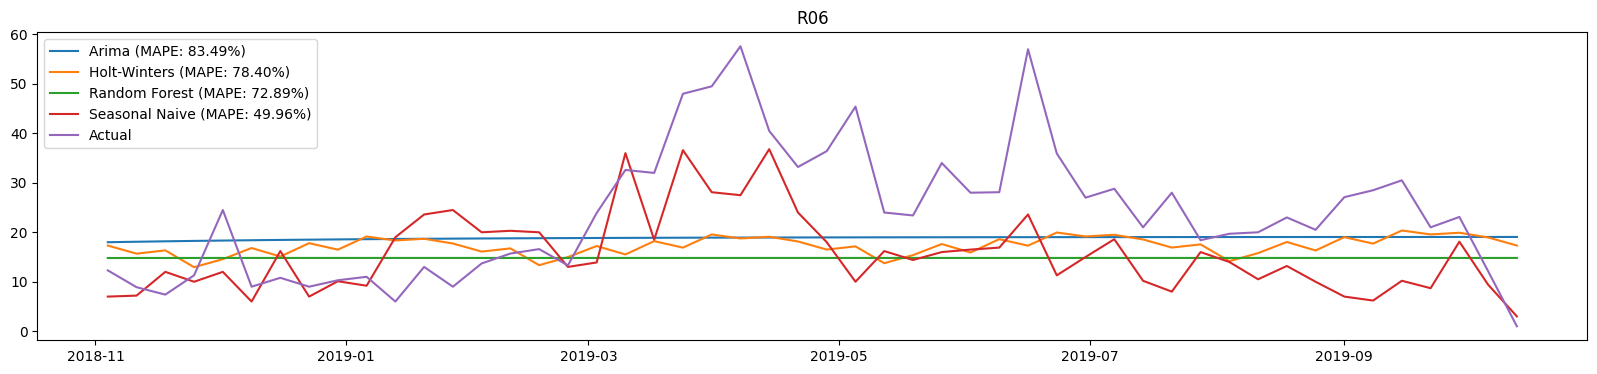

In [72]:
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    plt.figure(figsize=(20, 4))
    plt.title(x)
    plt.plot(arima[x], label=f'Arima (MAPE: {calculate_mape(weekly_test_data[x], arima[x]):.2f}%)')
    plt.plot(hw[x], label=f'Holt-Winters (MAPE: {calculate_mape(weekly_test_data[x], hw[x]):.2f}%)')
#     plt.plot(xgboost[x], label=f'XG Boost (MAPE: {calculate_mape(weekly_test_data[x], xgboost[x]):.2f}%)')
    plt.plot(rf[x], label=f'Random Forest (MAPE: {calculate_mape(weekly_test_data[x], rf[x]):.2f}%)')
#     plt.plot(sma[x], label=f'Moving Average (MAPE: {calculate_mape(weekly_test_data[x], sma[x]):.2f}%)')
    plt.plot(snaive[x], label=f'Seasonal Naive (MAPE: {calculate_mape(weekly_test_data[x], snaive[x]):.2f}%)')
    
    plt.plot(weekly_test_data[x], label='Actual')

    plt.legend(loc='upper left')
    plt.show()
    

In [73]:

categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
predicted_values = {
    'Arima': arima,
    'Holt-Winters': hw,
    'XG Boost': xgboost,
    'Random Forest': rf,
    'Simple Moving Average' : sma,
    'Seasonal Naive' : snaive
    
}

mape_df = pd.DataFrame(index=predicted_values.keys(), columns=categories)
for method, values in predicted_values.items():
    for category in categories:
        mape = calculate_mape(weekly_test_data[category], values[category])
        mape_df.loc[method, category] = mape

mape_df = mape_df.apply(pd.to_numeric)

def highlight_best(value):
    is_best = value == value.min()
    return ['background-color: yellow' if v else '' for v in is_best]

mape_df_styled = mape_df.style.apply(highlight_best, axis=0)
mape_df_styled



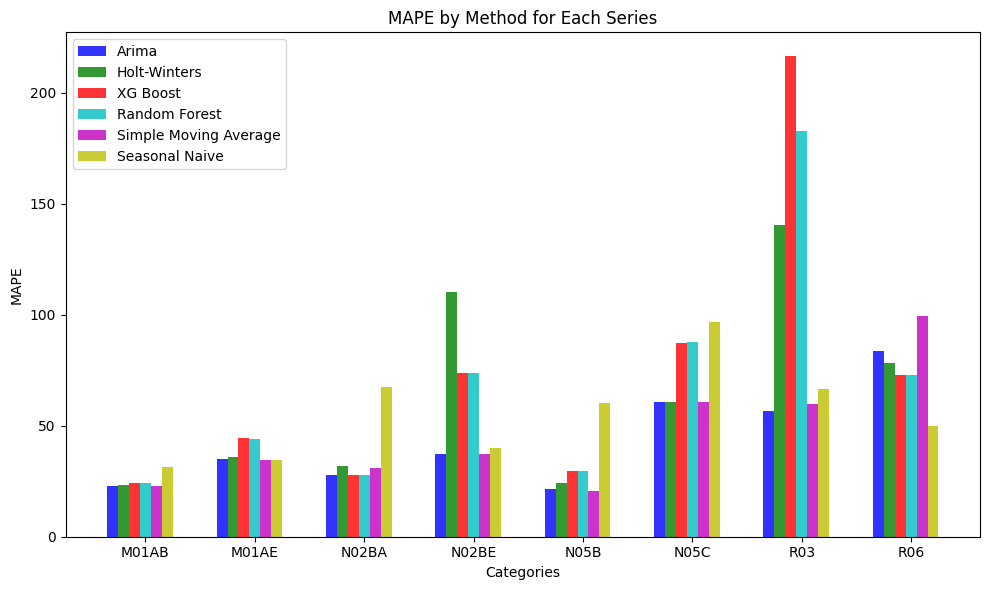

In [75]:
for method, values in predicted_values.items():
    for category in categories:
        mape = calculate_mape(weekly_test_data[category], values[category])
        mape_df.loc[method, category] = mape

mape_df = mape_df.apply(pd.to_numeric)

colors = ['b', 'g', 'r', 'c', 'm', 'y']

plt.figure(figsize=(10, 6))
x = list(range(len(categories)))  # Convert range to a list
bar_width = 0.1
opacity = 0.8

for i, method in enumerate(mape_df.index):
    plt.bar([val + (i * bar_width) for val in x], mape_df.loc[method], bar_width, alpha=opacity, color=colors[i], label=method)

plt.xlabel('Categories')
plt.ylabel('MAPE')
plt.title('MAPE by Method for Each Series')
plt.xticks([val + (len(predicted_values) / 2) * bar_width for val in x], categories)
plt.legend()

plt.tight_layout()
plt.show()
